# Models Comparison for TinyML

In [1]:
# Load libraries
import numpy as np
from numpy import arange
import pickle

#
import matplotlib.pyplot as plt

#
import pandas as pd
from pandas import read_csv

from sklearn.metrics import confusion_matrix,  classification_report, f1_score
from sklearn.model_selection import train_test_split, KFold,StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline

from keras.models import Sequential, Model 
from keras.layers import Dense, Input, concatenate, Activation, Dropout
from keras.optimizers import Adam
from tensorflow.keras import layers

import tensorflow
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from micromlgen import port
import tinymlgen as tiny

import warnings
import sys
import seaborn as sbs

warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tensorflow.random.set_seed(RANDOM_SEED)
np.set_printoptions(threshold=sys.maxsize)

## Change 'chosenIndex' to change the chosen Test (s/s3/s6)

In [3]:
dataXPath = ['../data/X.pkl', '../data/XS3.pkl', '../data/XS6.pkl']
dataYPath = ['../data/y.pkl', '../data/yS3.pkl', '../data/yS6.pkl']
choosenIndex = 1

with open(dataXPath[choosenIndex], 'rb') as f:
    X = pickle.load(f)

with open(dataYPath[choosenIndex], 'rb') as f:
    y = pickle.load(f)

In [4]:
print(np.unique(y))
labels = [str(el) for el in list(np.unique(y))]
print(labels)

[2000 2200 2400 2600 2800 3000]
['2000', '2200', '2400', '2600', '2800', '3000']


In [5]:
# Convert the labels in values like 0...n for the NN tests

labels = []
uniques = list(np.unique(y))

[labels.append(uniques.index(el)) for el in y]

y = np.array(labels)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RANDOM_SEED)

In [7]:
print(X_test)

[[4222.48 4241.73 4213.88 4238.89 4219.92 4236.06 4219.77 4250.12 4222.62
  4242.72 4232.34 4247.06 4223.43 4259.11 4228.34 4237.99 4238.51 4241.86
  4222.75 4250.35 4231.15 4238.69 4240.34 4250.1  4237.81 4264.28 4240.01
  4252.29 4245.64 4255.56 4227.65 4258.17]
 [5285.42 5275.73 5272.9  5272.49 5269.17 5265.02 5265.12 5264.83 5265.61
  5284.38 5268.85 5262.72 5256.22 5273.67 5264.37 5257.94 5265.68 5261.77
  5262.4  5270.34 5270.68 5263.   5266.57 5265.01 5252.83 5257.91 5274.09
  5259.18 5270.39 5264.49 5256.22 5263.44]
 [3525.27 3498.38 3523.3  3506.97 3516.33 3503.27 3519.36 3510.73 3511.36
  3508.88 3509.36 3493.99 3527.7  3502.72 3513.33 3513.13 3511.27 3513.54
  3519.03 3506.67 3508.41 3509.28 3512.73 3498.74 3515.28 3507.89 3510.81
  3501.01 3514.17 3498.34 3512.63 3507.36]
 [4903.88 4923.48 4937.63 4902.6  4916.25 4919.49 4913.59 4914.64 4918.55
  4904.83 4906.45 4913.39 4899.71 4903.37 4913.03 4907.08 4895.24 4911.73
  4896.33 4896.33 4907.86 4902.48 4895.   4907.6  4900.49

## Model Spotting

In [8]:
# Test options and evaluation metric
num_folds = 10
seed = 42
scoring = 'f1_macro'


In [23]:
# Spot-Check Algorithms
models = []

#models.append(('XGB', XGBClassifier(random_state=seed)))
models.append(('GNB', GaussianNB(var_smoothing=2e-9)))
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('CART' , DecisionTreeClassifier(random_state=seed)))
models.append(('SVC' , SVC(gamma=0.00001, random_state=seed)))
models.append(('RF', RandomForestClassifier(random_state=seed, n_estimators = 50)))


In [24]:
results = []
names = []
for name, model in models:
    # Dividere dati in n = num_folds
    kf = StratifiedKFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = np.array([])
    for train_idx, test_idx, in kf.split(X_train, y_train):
        X_cross_train, y_cross_train = X_train[train_idx], y_train[train_idx]
        X_cross_test, y_cross_test = X_train[test_idx], y_train[test_idx]
        model.fit(X_cross_train, y_cross_train)  
        y_pred = model.predict(X_cross_test)
        f1s = f1_score(y_cross_test, y_pred, average="weighted")
        cv_results = np.append(cv_results, [f1s])
    results.append(cv_results)
    names.append(name)
    #msg = "%s - %f - %f" % (name, cv_results.mean(), cv_results.std())
    msg = "{} - {:.2f} {:.2f}".format(name, cv_results.mean(), cv_results.std()).replace('.', ',')
    print(msg)

GNB - 0,87 0,05
LR - 0,11 0,04
CART - 0,96 0,02
SVC - 0,96 0,02
RF - 0,97 0,02


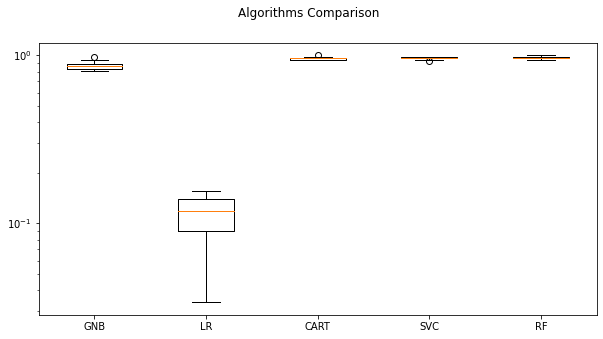

In [25]:
# Compare Algorithms
fig = plt.figure(figsize=(10,5))
fig.suptitle('Algorithms Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_yscale('log')
ax.set_xticklabels(names)
plt.show()

# Valutazione dei modelli sul Test Set

In [26]:
tasks = ['S', 'S3', 'S6']
def classification_report_csv(report, model_name):
    report_data = []
    lines = report.split('\n')
    index = 0
    row = lines[-4].split('    ')
    accuracy = row[-2]
    for line in lines[2:-5]:
        row = {}
        row_data = line.split('      ')
        row['class'] = uniques[index]
        row['precision'] = float(row_data[2]) 
        row['recall'] = float(row_data[3]) 
        row['f1_score'] = float(row_data[4])
        row['accuracy'] = accuracy
        report_data.append(row)
        index += 1
    dataframe = pd.DataFrame.from_dict(report_data)
    dataframe.to_csv(tasks[choosenIndex]+ '/classificationReports/'+'classification_report' + model_name +  '.csv', index = False)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RANDOM_SEED)
for name, model in models:
    model.fit(X_train,  y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print(f"Model {name}: ")
    report = classification_report(y_test, pred_test)
    print(report)
    classification_report_csv(report, name)
    print("-------------------------------------------------------------")

Model GNB: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.71      0.60      0.65        20
           2       0.91      1.00      0.95        20
           3       0.65      0.75      0.70        20
           4       1.00      0.90      0.95        20
           5       1.00      1.00      1.00        20

    accuracy                           0.88       120
   macro avg       0.88      0.88      0.87       120
weighted avg       0.88      0.88      0.87       120

-------------------------------------------------------------
Model LR: 
              precision    recall  f1-score   support

           0       0.07      0.10      0.08        20
           1       0.29      0.10      0.15        20
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        20
           4       0.31      0.20      0.24        20
           5       0.16      0.55      0.24    

# Valutazione Inferance Rate medio (|X_test| = 50/50/100)

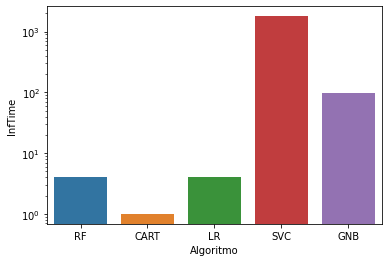

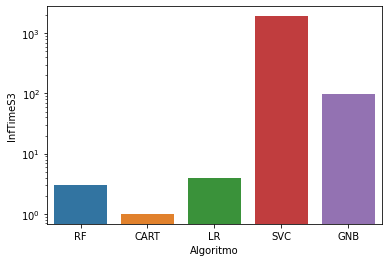

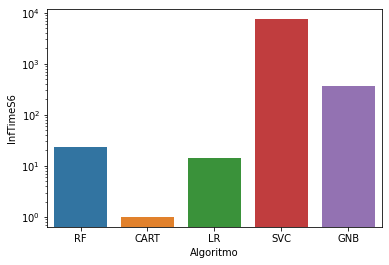

In [27]:
columns = ['InfTime', 'InfTimeS3', 'InfTimeS6']
for c in columns:
    csv = read_csv("InfTimeReport.csv")
    g = sbs.barplot(x=csv['Algoritmo'], y=csv[c])
    g.set_yscale("log")
    plt.ylabel(c)
    plt.show()


# Memoria occupata

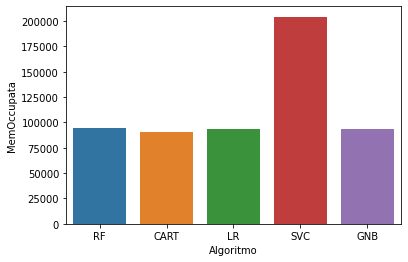

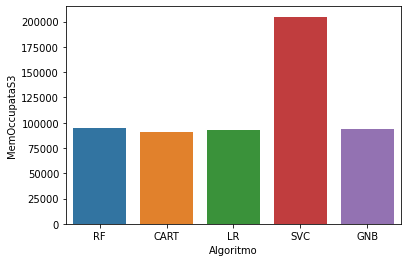

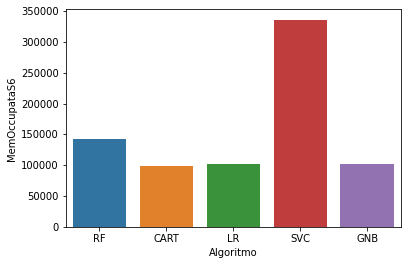

In [28]:
columns = ['MemOccupata', 'MemOccupataS3', 'MemOccupataS6']
for c in columns:   
    csv = read_csv("MemOccupationReport.csv")
    g = sbs.barplot(x=csv['Algoritmo'], y=csv[c])
    plt.ylabel(c)
    plt.show()

# Neural Network

In [48]:
def getNetwork(): 
    n = 100
    model = Sequential(name="Sequential-NN")
    model.add(layers.Dense(X.shape[1], activation='relu', input_shape=(X.shape[1],)))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(np.unique(y).size, activation='softmax'))
    learn_rate = 0.001
    opt = Adam(learning_rate=learn_rate)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

# Cross-Validation NN

In [51]:
EPOCHS = 1000
BATCH_SIZE = 16
num_folds = 10


kf = StratifiedKFold(n_splits=num_folds, random_state=seed, shuffle=True)
cv_results = np.array([])
for train_idx, test_idx, in kf.split(X_train, y_train):
    X_cross_train, y_cross_train = X_train[train_idx], y_train[train_idx]
    X_cross_test, y_cross_test = X_train[test_idx], y_train[test_idx]
    model = getNetwork()
    model.fit(X_cross_train, y_cross_train, epochs=EPOCHS, batch_size=BATCH_SIZE)  
    y_pred = model.predict(X_cross_test)
    predictions_categorical = np.argmax(y_pred, axis=1)
    f1s = f1_score(y_cross_test, predictions_categorical, average="weighted")
    cv_results = np.append(cv_results, [f1s])

print(f'Average score of Cross Validation: {cv_results.mean()}')

Model: "Sequential-NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_91 (Dense)             (None, 512)               16896     
_________________________________________________________________
dense_92 (Dense)             (None, 6)                 3078      
Total params: 21,030
Trainable params: 21,030
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
27/27 [==============================] - 0s 392us/step - loss: 431.7551 - accuracy: 0.1759
Epoch 2/1000
27/27 [==============================] - 0s 424us/step - loss: 264.6502 - accuracy: 0.1435
Epoch 3/1000
27/27 [==============================] - 0s 408us/step - loss: 203.8786 - accuracy: 0.1319
Epoch 4/1000
27/27 [==============================] - 0s 380us/step

27/27 [==============================] - 0s 412us/step - loss: 1.6558 - accuracy: 0.2824
Epoch 74/1000
27/27 [==============================] - 0s 366us/step - loss: 1.6425 - accuracy: 0.3125
Epoch 75/1000
27/27 [==============================] - 0s 388us/step - loss: 1.6836 - accuracy: 0.3056
Epoch 76/1000
27/27 [==============================] - 0s 409us/step - loss: 1.6647 - accuracy: 0.2731
Epoch 77/1000
27/27 [==============================] - 0s 429us/step - loss: 1.5527 - accuracy: 0.3264
Epoch 78/1000
27/27 [==============================] - 0s 389us/step - loss: 1.5860 - accuracy: 0.3264
Epoch 79/1000
27/27 [==============================] - 0s 384us/step - loss: 1.5591 - accuracy: 0.3310
Epoch 80/1000
27/27 [==============================] - 0s 414us/step - loss: 1.5923 - accuracy: 0.3009
Epoch 81/1000
27/27 [==============================] - 0s 422us/step - loss: 1.6122 - accuracy: 0.3079
Epoch 82/1000
27/27 [==============================] - 0s 378us/step - loss: 1.6155 - a

27/27 [==============================] - 0s 399us/step - loss: 1.5741 - accuracy: 0.3333
Epoch 153/1000
27/27 [==============================] - 0s 418us/step - loss: 1.5616 - accuracy: 0.2731
Epoch 154/1000
27/27 [==============================] - 0s 375us/step - loss: 1.5614 - accuracy: 0.3380
Epoch 155/1000
27/27 [==============================] - 0s 400us/step - loss: 1.5662 - accuracy: 0.3009
Epoch 156/1000
27/27 [==============================] - 0s 398us/step - loss: 1.5866 - accuracy: 0.2731
Epoch 157/1000
27/27 [==============================] - 0s 418us/step - loss: 1.5289 - accuracy: 0.3472
Epoch 158/1000
27/27 [==============================] - 0s 388us/step - loss: 1.5669 - accuracy: 0.2940
Epoch 159/1000
27/27 [==============================] - 0s 387us/step - loss: 1.5662 - accuracy: 0.3218
Epoch 160/1000
27/27 [==============================] - 0s 413us/step - loss: 1.6505 - accuracy: 0.3218
Epoch 161/1000
27/27 [==============================] - 0s 404us/step - loss: 1

27/27 [==============================] - 0s 402us/step - loss: 1.5109 - accuracy: 0.3148
Epoch 231/1000
27/27 [==============================] - 0s 376us/step - loss: 1.5225 - accuracy: 0.3310
Epoch 232/1000
27/27 [==============================] - 0s 426us/step - loss: 1.5010 - accuracy: 0.3449
Epoch 233/1000
27/27 [==============================] - 0s 483us/step - loss: 1.5116 - accuracy: 0.3356
Epoch 234/1000
27/27 [==============================] - 0s 426us/step - loss: 1.4188 - accuracy: 0.3958
Epoch 235/1000
27/27 [==============================] - 0s 392us/step - loss: 1.3944 - accuracy: 0.3866
Epoch 236/1000
27/27 [==============================] - 0s 379us/step - loss: 1.4917 - accuracy: 0.3472
Epoch 237/1000
27/27 [==============================] - 0s 416us/step - loss: 1.6245 - accuracy: 0.2963
Epoch 238/1000
27/27 [==============================] - 0s 412us/step - loss: 1.5754 - accuracy: 0.2940
Epoch 239/1000
27/27 [==============================] - 0s 398us/step - loss: 1

27/27 [==============================] - 0s 424us/step - loss: 1.7723 - accuracy: 0.1713
Epoch 309/1000
27/27 [==============================] - 0s 393us/step - loss: 1.7732 - accuracy: 0.1597
Epoch 310/1000
27/27 [==============================] - 0s 377us/step - loss: 1.7741 - accuracy: 0.1782
Epoch 311/1000
27/27 [==============================] - 0s 415us/step - loss: 1.7739 - accuracy: 0.1458
Epoch 312/1000
27/27 [==============================] - 0s 396us/step - loss: 1.7749 - accuracy: 0.1481
Epoch 313/1000
27/27 [==============================] - 0s 389us/step - loss: 1.7757 - accuracy: 0.1574
Epoch 314/1000
27/27 [==============================] - 0s 388us/step - loss: 1.7757 - accuracy: 0.1481
Epoch 315/1000
27/27 [==============================] - 0s 421us/step - loss: 1.7753 - accuracy: 0.1435
Epoch 316/1000
27/27 [==============================] - 0s 428us/step - loss: 1.7752 - accuracy: 0.1736
Epoch 317/1000
27/27 [==============================] - 0s 399us/step - loss: 1

27/27 [==============================] - 0s 434us/step - loss: 1.7762 - accuracy: 0.1574
Epoch 387/1000
27/27 [==============================] - 0s 369us/step - loss: 1.7746 - accuracy: 0.1597
Epoch 388/1000
27/27 [==============================] - 0s 404us/step - loss: 1.7741 - accuracy: 0.1597
Epoch 389/1000
27/27 [==============================] - 0s 428us/step - loss: 1.7742 - accuracy: 0.1690
Epoch 390/1000
27/27 [==============================] - 0s 396us/step - loss: 1.7785 - accuracy: 0.1574
Epoch 391/1000
27/27 [==============================] - 0s 373us/step - loss: 1.7766 - accuracy: 0.1528
Epoch 392/1000
27/27 [==============================] - 0s 410us/step - loss: 1.7751 - accuracy: 0.1551
Epoch 393/1000
27/27 [==============================] - 0s 433us/step - loss: 1.7766 - accuracy: 0.1667
Epoch 394/1000
27/27 [==============================] - 0s 408us/step - loss: 1.7775 - accuracy: 0.1389
Epoch 395/1000
27/27 [==============================] - 0s 385us/step - loss: 1

27/27 [==============================] - 0s 389us/step - loss: 1.7769 - accuracy: 0.1551
Epoch 465/1000
27/27 [==============================] - 0s 412us/step - loss: 1.7768 - accuracy: 0.1667
Epoch 466/1000
27/27 [==============================] - 0s 405us/step - loss: 1.7764 - accuracy: 0.1690
Epoch 467/1000
27/27 [==============================] - 0s 407us/step - loss: 1.7734 - accuracy: 0.1551
Epoch 468/1000
27/27 [==============================] - 0s 377us/step - loss: 1.7771 - accuracy: 0.1458
Epoch 469/1000
27/27 [==============================] - 0s 418us/step - loss: 1.7788 - accuracy: 0.1065
Epoch 470/1000
27/27 [==============================] - 0s 412us/step - loss: 1.7759 - accuracy: 0.1574
Epoch 471/1000
27/27 [==============================] - 0s 388us/step - loss: 1.7757 - accuracy: 0.1644
Epoch 472/1000
27/27 [==============================] - 0s 389us/step - loss: 1.7767 - accuracy: 0.1366
Epoch 473/1000
27/27 [==============================] - 0s 402us/step - loss: 1

27/27 [==============================] - 0s 412us/step - loss: 1.7808 - accuracy: 0.1528
Epoch 543/1000
27/27 [==============================] - 0s 422us/step - loss: 1.7814 - accuracy: 0.1620
Epoch 544/1000
27/27 [==============================] - 0s 407us/step - loss: 1.7788 - accuracy: 0.1644
Epoch 545/1000
27/27 [==============================] - 0s 381us/step - loss: 1.7770 - accuracy: 0.1505
Epoch 546/1000
27/27 [==============================] - 0s 411us/step - loss: 1.7767 - accuracy: 0.1644
Epoch 547/1000
27/27 [==============================] - 0s 420us/step - loss: 1.7795 - accuracy: 0.1481
Epoch 548/1000
27/27 [==============================] - 0s 388us/step - loss: 1.7767 - accuracy: 0.1458
Epoch 549/1000
27/27 [==============================] - 0s 391us/step - loss: 1.7771 - accuracy: 0.1551
Epoch 550/1000
27/27 [==============================] - 0s 435us/step - loss: 1.7789 - accuracy: 0.1528
Epoch 551/1000
27/27 [==============================] - 0s 408us/step - loss: 1

27/27 [==============================] - 0s 420us/step - loss: 1.7787 - accuracy: 0.1551
Epoch 621/1000
27/27 [==============================] - 0s 395us/step - loss: 1.7778 - accuracy: 0.1644
Epoch 622/1000
27/27 [==============================] - 0s 417us/step - loss: 1.7759 - accuracy: 0.1528
Epoch 623/1000
27/27 [==============================] - 0s 428us/step - loss: 1.7786 - accuracy: 0.1736
Epoch 624/1000
27/27 [==============================] - 0s 423us/step - loss: 1.7769 - accuracy: 0.1528
Epoch 625/1000
27/27 [==============================] - 0s 382us/step - loss: 1.7800 - accuracy: 0.1551
Epoch 626/1000
27/27 [==============================] - 0s 413us/step - loss: 1.7791 - accuracy: 0.1759
Epoch 627/1000
27/27 [==============================] - 0s 408us/step - loss: 1.7803 - accuracy: 0.1435
Epoch 628/1000
27/27 [==============================] - 0s 399us/step - loss: 1.7799 - accuracy: 0.1528
Epoch 629/1000
27/27 [==============================] - 0s 458us/step - loss: 1

27/27 [==============================] - 0s 426us/step - loss: 1.7938 - accuracy: 0.1597
Epoch 699/1000
27/27 [==============================] - 0s 416us/step - loss: 1.7923 - accuracy: 0.1412
Epoch 700/1000
27/27 [==============================] - 0s 395us/step - loss: 1.7933 - accuracy: 0.1597
Epoch 701/1000
27/27 [==============================] - 0s 434us/step - loss: 1.7917 - accuracy: 0.1620
Epoch 702/1000
27/27 [==============================] - 0s 421us/step - loss: 1.7928 - accuracy: 0.1690
Epoch 703/1000
27/27 [==============================] - 0s 403us/step - loss: 1.7900 - accuracy: 0.1644
Epoch 704/1000
27/27 [==============================] - 0s 379us/step - loss: 1.7933 - accuracy: 0.1389
Epoch 705/1000
27/27 [==============================] - 0s 396us/step - loss: 1.7905 - accuracy: 0.1759
Epoch 706/1000
27/27 [==============================] - 0s 425us/step - loss: 1.7906 - accuracy: 0.1551
Epoch 707/1000
27/27 [==============================] - 0s 425us/step - loss: 1

27/27 [==============================] - 0s 430us/step - loss: 1.7940 - accuracy: 0.1782
Epoch 777/1000
27/27 [==============================] - 0s 428us/step - loss: 1.7911 - accuracy: 0.1366
Epoch 778/1000
27/27 [==============================] - 0s 471us/step - loss: 1.7887 - accuracy: 0.1481
Epoch 779/1000
27/27 [==============================] - 0s 397us/step - loss: 1.7887 - accuracy: 0.1551
Epoch 780/1000
27/27 [==============================] - 0s 396us/step - loss: 1.7920 - accuracy: 0.1319
Epoch 781/1000
27/27 [==============================] - 0s 431us/step - loss: 1.7909 - accuracy: 0.1181
Epoch 782/1000
27/27 [==============================] - 0s 422us/step - loss: 1.7902 - accuracy: 0.1528
Epoch 783/1000
27/27 [==============================] - 0s 433us/step - loss: 1.7921 - accuracy: 0.1343
Epoch 784/1000
27/27 [==============================] - 0s 378us/step - loss: 1.7929 - accuracy: 0.1389
Epoch 785/1000
27/27 [==============================] - 0s 412us/step - loss: 1

27/27 [==============================] - 0s 415us/step - loss: 1.7894 - accuracy: 0.1343
Epoch 855/1000
27/27 [==============================] - 0s 405us/step - loss: 1.7911 - accuracy: 0.1389
Epoch 856/1000
27/27 [==============================] - 0s 434us/step - loss: 1.7937 - accuracy: 0.1412
Epoch 857/1000
27/27 [==============================] - 0s 428us/step - loss: 1.7923 - accuracy: 0.1620
Epoch 858/1000
27/27 [==============================] - 0s 405us/step - loss: 1.7957 - accuracy: 0.1574
Epoch 859/1000
27/27 [==============================] - 0s 385us/step - loss: 1.7907 - accuracy: 0.1574
Epoch 860/1000
27/27 [==============================] - 0s 412us/step - loss: 1.7893 - accuracy: 0.1458
Epoch 861/1000
27/27 [==============================] - 0s 408us/step - loss: 1.7912 - accuracy: 0.1551
Epoch 862/1000
27/27 [==============================] - 0s 427us/step - loss: 1.7920 - accuracy: 0.1528
Epoch 863/1000
27/27 [==============================] - 0s 385us/step - loss: 1

27/27 [==============================] - 0s 404us/step - loss: 1.7882 - accuracy: 0.1343
Epoch 933/1000
27/27 [==============================] - 0s 426us/step - loss: 1.7908 - accuracy: 0.1250
Epoch 934/1000
27/27 [==============================] - 0s 405us/step - loss: 1.7901 - accuracy: 0.1412
Epoch 935/1000
27/27 [==============================] - 0s 371us/step - loss: 1.7891 - accuracy: 0.1528
Epoch 936/1000
27/27 [==============================] - 0s 420us/step - loss: 1.7908 - accuracy: 0.1389
Epoch 937/1000
27/27 [==============================] - 0s 435us/step - loss: 1.7917 - accuracy: 0.1296
Epoch 938/1000
27/27 [==============================] - 0s 400us/step - loss: 1.7917 - accuracy: 0.1412
Epoch 939/1000
27/27 [==============================] - 0s 375us/step - loss: 1.7889 - accuracy: 0.1667
Epoch 940/1000
27/27 [==============================] - 0s 406us/step - loss: 1.7905 - accuracy: 0.1227
Epoch 941/1000
27/27 [==============================] - 0s 423us/step - loss: 1

27/27 [==============================] - 0s 412us/step - loss: 202.7697 - accuracy: 0.1505
Epoch 4/1000
27/27 [==============================] - 0s 428us/step - loss: 127.0232 - accuracy: 0.1713
Epoch 5/1000
27/27 [==============================] - 0s 387us/step - loss: 180.2903 - accuracy: 0.1782
Epoch 6/1000
27/27 [==============================] - 0s 405us/step - loss: 116.3423 - accuracy: 0.1551
Epoch 7/1000
27/27 [==============================] - 0s 419us/step - loss: 141.4049 - accuracy: 0.1644
Epoch 8/1000
27/27 [==============================] - 0s 407us/step - loss: 148.4900 - accuracy: 0.1667
Epoch 9/1000
27/27 [==============================] - 0s 408us/step - loss: 89.0301 - accuracy: 0.2060
Epoch 10/1000
27/27 [==============================] - 0s 394us/step - loss: 76.0615 - accuracy: 0.1759
Epoch 11/1000
27/27 [==============================] - 0s 408us/step - loss: 85.5506 - accuracy: 0.1921
Epoch 12/1000
27/27 [==============================] - 0s 424us/step - loss: 8

27/27 [==============================] - 0s 424us/step - loss: 1.8543 - accuracy: 0.2616
Epoch 83/1000
27/27 [==============================] - 0s 406us/step - loss: 1.8288 - accuracy: 0.3194
Epoch 84/1000
27/27 [==============================] - 0s 443us/step - loss: 1.6691 - accuracy: 0.2755
Epoch 85/1000
27/27 [==============================] - 0s 436us/step - loss: 1.6089 - accuracy: 0.3102
Epoch 86/1000
27/27 [==============================] - 0s 419us/step - loss: 1.6535 - accuracy: 0.3125
Epoch 87/1000
27/27 [==============================] - 0s 413us/step - loss: 1.5893 - accuracy: 0.3125
Epoch 88/1000
27/27 [==============================] - 0s 389us/step - loss: 1.6211 - accuracy: 0.3148
Epoch 89/1000
27/27 [==============================] - 0s 416us/step - loss: 1.7489 - accuracy: 0.2685
Epoch 90/1000
27/27 [==============================] - 0s 418us/step - loss: 1.6023 - accuracy: 0.3079
Epoch 91/1000
27/27 [==============================] - 0s 415us/step - loss: 1.7557 - a

Epoch 161/1000
27/27 [==============================] - 0s 434us/step - loss: 1.5360 - accuracy: 0.3218
Epoch 162/1000
27/27 [==============================] - 0s 434us/step - loss: 1.5084 - accuracy: 0.3403
Epoch 163/1000
27/27 [==============================] - 0s 440us/step - loss: 1.4772 - accuracy: 0.3611
Epoch 164/1000
27/27 [==============================] - 0s 410us/step - loss: 1.5580 - accuracy: 0.3009
Epoch 165/1000
27/27 [==============================] - 0s 423us/step - loss: 1.5621 - accuracy: 0.3403
Epoch 166/1000
27/27 [==============================] - 0s 446us/step - loss: 1.5531 - accuracy: 0.3588
Epoch 167/1000
27/27 [==============================] - 0s 439us/step - loss: 1.5782 - accuracy: 0.3218
Epoch 168/1000
27/27 [==============================] - 0s 426us/step - loss: 1.5930 - accuracy: 0.3032
Epoch 169/1000
27/27 [==============================] - 0s 404us/step - loss: 1.5156 - accuracy: 0.3449
Epoch 170/1000
27/27 [==============================] - 0s 413us

27/27 [==============================] - 0s 380us/step - loss: 1.4713 - accuracy: 0.3773
Epoch 240/1000
27/27 [==============================] - 0s 442us/step - loss: 1.4706 - accuracy: 0.3287
Epoch 241/1000
27/27 [==============================] - 0s 443us/step - loss: 1.4848 - accuracy: 0.3843
Epoch 242/1000
27/27 [==============================] - 0s 444us/step - loss: 1.4546 - accuracy: 0.3704
Epoch 243/1000
27/27 [==============================] - 0s 433us/step - loss: 1.4966 - accuracy: 0.3333
Epoch 244/1000
27/27 [==============================] - 0s 393us/step - loss: 1.5319 - accuracy: 0.3426
Epoch 245/1000
27/27 [==============================] - 0s 423us/step - loss: 1.5284 - accuracy: 0.3380
Epoch 246/1000
27/27 [==============================] - 0s 420us/step - loss: 1.6333 - accuracy: 0.2847
Epoch 247/1000
27/27 [==============================] - 0s 428us/step - loss: 1.5333 - accuracy: 0.3310
Epoch 248/1000
27/27 [==============================] - 0s 431us/step - loss: 1

27/27 [==============================] - 0s 421us/step - loss: 1.3731 - accuracy: 0.4213
Epoch 318/1000
27/27 [==============================] - 0s 389us/step - loss: 1.3858 - accuracy: 0.3958
Epoch 319/1000
27/27 [==============================] - 0s 421us/step - loss: 1.5592 - accuracy: 0.2940
Epoch 320/1000
27/27 [==============================] - 0s 425us/step - loss: 1.5578 - accuracy: 0.3449
Epoch 321/1000
27/27 [==============================] - 0s 411us/step - loss: 1.5124 - accuracy: 0.3241
Epoch 322/1000
27/27 [==============================] - 0s 402us/step - loss: 1.5156 - accuracy: 0.3218
Epoch 323/1000
27/27 [==============================] - 0s 397us/step - loss: 1.6264 - accuracy: 0.3009
Epoch 324/1000
27/27 [==============================] - 0s 426us/step - loss: 1.5122 - accuracy: 0.3611
Epoch 325/1000
27/27 [==============================] - 0s 428us/step - loss: 1.5746 - accuracy: 0.3102
Epoch 326/1000
27/27 [==============================] - 0s 424us/step - loss: 1

27/27 [==============================] - 0s 428us/step - loss: 1.3924 - accuracy: 0.3681
Epoch 396/1000
27/27 [==============================] - 0s 402us/step - loss: 1.3283 - accuracy: 0.3796
Epoch 397/1000
27/27 [==============================] - 0s 419us/step - loss: 1.3395 - accuracy: 0.3958
Epoch 398/1000
27/27 [==============================] - 0s 436us/step - loss: 1.3472 - accuracy: 0.3843
Epoch 399/1000
27/27 [==============================] - 0s 429us/step - loss: 1.4018 - accuracy: 0.3588
Epoch 400/1000
27/27 [==============================] - 0s 409us/step - loss: 1.7092 - accuracy: 0.3102
Epoch 401/1000
27/27 [==============================] - 0s 401us/step - loss: 1.5855 - accuracy: 0.3079
Epoch 402/1000
27/27 [==============================] - 0s 436us/step - loss: 1.4445 - accuracy: 0.3704
Epoch 403/1000
27/27 [==============================] - 0s 433us/step - loss: 1.3855 - accuracy: 0.3889
Epoch 404/1000
27/27 [==============================] - 0s 420us/step - loss: 1

27/27 [==============================] - 0s 427us/step - loss: 1.3636 - accuracy: 0.3866
Epoch 474/1000
27/27 [==============================] - 0s 421us/step - loss: 1.3833 - accuracy: 0.3935
Epoch 475/1000
27/27 [==============================] - 0s 405us/step - loss: 1.2345 - accuracy: 0.4398
Epoch 476/1000
27/27 [==============================] - 0s 388us/step - loss: 1.2741 - accuracy: 0.4421
Epoch 477/1000
27/27 [==============================] - 0s 427us/step - loss: 1.3810 - accuracy: 0.4259
Epoch 478/1000
27/27 [==============================] - 0s 413us/step - loss: 1.3928 - accuracy: 0.3495
Epoch 479/1000
27/27 [==============================] - 0s 437us/step - loss: 1.2893 - accuracy: 0.4028
Epoch 480/1000
27/27 [==============================] - 0s 374us/step - loss: 1.3805 - accuracy: 0.4398
Epoch 481/1000
27/27 [==============================] - 0s 395us/step - loss: 1.3887 - accuracy: 0.3796
Epoch 482/1000
27/27 [==============================] - 0s 433us/step - loss: 1

27/27 [==============================] - 0s 423us/step - loss: 1.1973 - accuracy: 0.4236
Epoch 552/1000
27/27 [==============================] - 0s 434us/step - loss: 1.1480 - accuracy: 0.4745
Epoch 553/1000
27/27 [==============================] - 0s 435us/step - loss: 1.2317 - accuracy: 0.4236
Epoch 554/1000
27/27 [==============================] - 0s 395us/step - loss: 1.2084 - accuracy: 0.4028
Epoch 555/1000
27/27 [==============================] - 0s 386us/step - loss: 1.1257 - accuracy: 0.4699
Epoch 556/1000
27/27 [==============================] - 0s 422us/step - loss: 1.0846 - accuracy: 0.5185
Epoch 557/1000
27/27 [==============================] - 0s 432us/step - loss: 1.0523 - accuracy: 0.5509
Epoch 558/1000
27/27 [==============================] - 0s 401us/step - loss: 1.0864 - accuracy: 0.5162
Epoch 559/1000
27/27 [==============================] - 0s 411us/step - loss: 1.1045 - accuracy: 0.4884
Epoch 560/1000
27/27 [==============================] - 0s 479us/step - loss: 1

27/27 [==============================] - 0s 404us/step - loss: 0.9839 - accuracy: 0.5347
Epoch 630/1000
27/27 [==============================] - 0s 421us/step - loss: 0.8957 - accuracy: 0.6435
Epoch 631/1000
27/27 [==============================] - 0s 424us/step - loss: 0.8536 - accuracy: 0.6806
Epoch 632/1000
27/27 [==============================] - 0s 400us/step - loss: 0.9579 - accuracy: 0.5787
Epoch 633/1000
27/27 [==============================] - 0s 375us/step - loss: 0.9473 - accuracy: 0.5787
Epoch 634/1000
27/27 [==============================] - 0s 414us/step - loss: 0.9681 - accuracy: 0.5463
Epoch 635/1000
27/27 [==============================] - 0s 420us/step - loss: 1.0038 - accuracy: 0.5208
Epoch 636/1000
27/27 [==============================] - 0s 400us/step - loss: 0.9401 - accuracy: 0.5532
Epoch 637/1000
27/27 [==============================] - 0s 399us/step - loss: 0.8759 - accuracy: 0.6204
Epoch 638/1000
27/27 [==============================] - 0s 416us/step - loss: 0

27/27 [==============================] - 0s 419us/step - loss: 0.7473 - accuracy: 0.7338
Epoch 708/1000
27/27 [==============================] - 0s 437us/step - loss: 0.8069 - accuracy: 0.6273
Epoch 709/1000
27/27 [==============================] - 0s 418us/step - loss: 0.8445 - accuracy: 0.6111
Epoch 710/1000
27/27 [==============================] - 0s 386us/step - loss: 0.8575 - accuracy: 0.5833
Epoch 711/1000
27/27 [==============================] - 0s 407us/step - loss: 0.9016 - accuracy: 0.5394
Epoch 712/1000
27/27 [==============================] - 0s 435us/step - loss: 0.8181 - accuracy: 0.6505
Epoch 713/1000
27/27 [==============================] - 0s 423us/step - loss: 0.9023 - accuracy: 0.5741
Epoch 714/1000
27/27 [==============================] - 0s 396us/step - loss: 0.8337 - accuracy: 0.6250
Epoch 715/1000
27/27 [==============================] - 0s 398us/step - loss: 0.9680 - accuracy: 0.5301
Epoch 716/1000
27/27 [==============================] - 0s 428us/step - loss: 0

27/27 [==============================] - 0s 412us/step - loss: 0.7294 - accuracy: 0.7292
Epoch 786/1000
27/27 [==============================] - 0s 426us/step - loss: 0.7228 - accuracy: 0.7338
Epoch 787/1000
27/27 [==============================] - 0s 430us/step - loss: 0.8492 - accuracy: 0.5532
Epoch 788/1000
27/27 [==============================] - 0s 409us/step - loss: 0.7077 - accuracy: 0.7593
Epoch 789/1000
27/27 [==============================] - 0s 378us/step - loss: 0.6945 - accuracy: 0.7755
Epoch 790/1000
27/27 [==============================] - 0s 422us/step - loss: 0.7179 - accuracy: 0.7222
Epoch 791/1000
27/27 [==============================] - 0s 425us/step - loss: 0.7242 - accuracy: 0.7060
Epoch 792/1000
27/27 [==============================] - 0s 417us/step - loss: 0.7654 - accuracy: 0.6713
Epoch 793/1000
27/27 [==============================] - 0s 390us/step - loss: 0.8309 - accuracy: 0.6296
Epoch 794/1000
27/27 [==============================] - 0s 408us/step - loss: 0

27/27 [==============================] - 0s 397us/step - loss: 0.6816 - accuracy: 0.6852
Epoch 864/1000
27/27 [==============================] - 0s 422us/step - loss: 0.7403 - accuracy: 0.6991
Epoch 865/1000
27/27 [==============================] - 0s 432us/step - loss: 0.7046 - accuracy: 0.6898
Epoch 866/1000
27/27 [==============================] - 0s 414us/step - loss: 0.7432 - accuracy: 0.6597
Epoch 867/1000
27/27 [==============================] - 0s 390us/step - loss: 0.7693 - accuracy: 0.6389
Epoch 868/1000
27/27 [==============================] - 0s 427us/step - loss: 0.6626 - accuracy: 0.7199
Epoch 869/1000
27/27 [==============================] - 0s 416us/step - loss: 0.6459 - accuracy: 0.7593
Epoch 870/1000
27/27 [==============================] - 0s 431us/step - loss: 0.6231 - accuracy: 0.7940
Epoch 871/1000
27/27 [==============================] - 0s 389us/step - loss: 0.7089 - accuracy: 0.7083
Epoch 872/1000
27/27 [==============================] - 0s 409us/step - loss: 0

27/27 [==============================] - 0s 389us/step - loss: 0.6025 - accuracy: 0.7708
Epoch 942/1000
27/27 [==============================] - 0s 439us/step - loss: 0.5917 - accuracy: 0.7847
Epoch 943/1000
27/27 [==============================] - 0s 457us/step - loss: 0.5888 - accuracy: 0.7847
Epoch 944/1000
27/27 [==============================] - 0s 426us/step - loss: 0.6829 - accuracy: 0.6620
Epoch 945/1000
27/27 [==============================] - 0s 385us/step - loss: 0.6333 - accuracy: 0.7454
Epoch 946/1000
27/27 [==============================] - 0s 405us/step - loss: 0.5822 - accuracy: 0.7986
Epoch 947/1000
27/27 [==============================] - 0s 408us/step - loss: 0.6362 - accuracy: 0.7269
Epoch 948/1000
27/27 [==============================] - 0s 419us/step - loss: 0.7108 - accuracy: 0.6644
Epoch 949/1000
27/27 [==============================] - 0s 406us/step - loss: 0.6446 - accuracy: 0.7014
Epoch 950/1000
27/27 [==============================] - 0s 397us/step - loss: 0

27/27 [==============================] - 0s 420us/step - loss: 16.1113 - accuracy: 0.1690
Epoch 13/1000
27/27 [==============================] - 0s 440us/step - loss: 23.0407 - accuracy: 0.1597
Epoch 14/1000
27/27 [==============================] - 0s 414us/step - loss: 18.0270 - accuracy: 0.1458
Epoch 15/1000
27/27 [==============================] - 0s 388us/step - loss: 11.0415 - accuracy: 0.1759
Epoch 16/1000
27/27 [==============================] - 0s 404us/step - loss: 11.8866 - accuracy: 0.1875
Epoch 17/1000
27/27 [==============================] - 0s 430us/step - loss: 6.2725 - accuracy: 0.1898
Epoch 18/1000
27/27 [==============================] - 0s 407us/step - loss: 5.4157 - accuracy: 0.1713
Epoch 19/1000
27/27 [==============================] - 0s 409us/step - loss: 4.3353 - accuracy: 0.1829
Epoch 20/1000
27/27 [==============================] - 0s 402us/step - loss: 4.4231 - accuracy: 0.2014
Epoch 21/1000
27/27 [==============================] - 0s 428us/step - loss: 4.156

27/27 [==============================] - 0s 404us/step - loss: 2.1406 - accuracy: 0.2500
Epoch 92/1000
27/27 [==============================] - 0s 399us/step - loss: 1.6890 - accuracy: 0.3356
Epoch 93/1000
27/27 [==============================] - 0s 421us/step - loss: 1.8140 - accuracy: 0.2708
Epoch 94/1000
27/27 [==============================] - 0s 412us/step - loss: 1.7302 - accuracy: 0.2801
Epoch 95/1000
27/27 [==============================] - 0s 405us/step - loss: 4.3279 - accuracy: 0.2523
Epoch 96/1000
27/27 [==============================] - 0s 394us/step - loss: 2.7595 - accuracy: 0.2176
Epoch 97/1000
27/27 [==============================] - 0s 435us/step - loss: 1.7184 - accuracy: 0.2454
Epoch 98/1000
27/27 [==============================] - 0s 426us/step - loss: 1.6608 - accuracy: 0.2847
Epoch 99/1000
27/27 [==============================] - 0s 421us/step - loss: 1.6579 - accuracy: 0.2870
Epoch 100/1000
27/27 [==============================] - 0s 381us/step - loss: 1.6302 - 

Epoch 170/1000
27/27 [==============================] - 0s 427us/step - loss: 1.6626 - accuracy: 0.3148
Epoch 171/1000
27/27 [==============================] - 0s 441us/step - loss: 1.6614 - accuracy: 0.3009
Epoch 172/1000
27/27 [==============================] - 0s 412us/step - loss: 1.5814 - accuracy: 0.2778
Epoch 173/1000
27/27 [==============================] - 0s 408us/step - loss: 1.5687 - accuracy: 0.3310
Epoch 174/1000
27/27 [==============================] - 0s 393us/step - loss: 1.5858 - accuracy: 0.2963
Epoch 175/1000
27/27 [==============================] - 0s 425us/step - loss: 1.5207 - accuracy: 0.3426
Epoch 176/1000
27/27 [==============================] - 0s 428us/step - loss: 1.5586 - accuracy: 0.3704
Epoch 177/1000
27/27 [==============================] - 0s 424us/step - loss: 1.5670 - accuracy: 0.3032
Epoch 178/1000
27/27 [==============================] - 0s 394us/step - loss: 1.6050 - accuracy: 0.3102
Epoch 179/1000
27/27 [==============================] - 0s 417us

27/27 [==============================] - 0s 416us/step - loss: 1.5865 - accuracy: 0.3472
Epoch 249/1000
27/27 [==============================] - 0s 409us/step - loss: 1.5511 - accuracy: 0.3241
Epoch 250/1000
27/27 [==============================] - 0s 436us/step - loss: 1.7090 - accuracy: 0.2986
Epoch 251/1000
27/27 [==============================] - 0s 418us/step - loss: 1.6612 - accuracy: 0.3079
Epoch 252/1000
27/27 [==============================] - 0s 403us/step - loss: 1.4834 - accuracy: 0.3542
Epoch 253/1000
27/27 [==============================] - 0s 399us/step - loss: 1.5539 - accuracy: 0.2986
Epoch 254/1000
27/27 [==============================] - 0s 431us/step - loss: 1.6570 - accuracy: 0.3102
Epoch 255/1000
27/27 [==============================] - 0s 458us/step - loss: 1.5808 - accuracy: 0.3125
Epoch 256/1000
27/27 [==============================] - 0s 415us/step - loss: 1.6728 - accuracy: 0.3079
Epoch 257/1000
27/27 [==============================] - 0s 399us/step - loss: 1

27/27 [==============================] - 0s 412us/step - loss: 1.6034 - accuracy: 0.3356
Epoch 327/1000
27/27 [==============================] - 0s 434us/step - loss: 1.5228 - accuracy: 0.3634
Epoch 328/1000
27/27 [==============================] - 0s 406us/step - loss: 1.7258 - accuracy: 0.3333
Epoch 329/1000
27/27 [==============================] - 0s 427us/step - loss: 1.6770 - accuracy: 0.3495
Epoch 330/1000
27/27 [==============================] - 0s 379us/step - loss: 1.8427 - accuracy: 0.2917
Epoch 331/1000
27/27 [==============================] - 0s 439us/step - loss: 1.6185 - accuracy: 0.3287
Epoch 332/1000
27/27 [==============================] - 0s 423us/step - loss: 1.6029 - accuracy: 0.3102
Epoch 333/1000
27/27 [==============================] - 0s 423us/step - loss: 1.7664 - accuracy: 0.2778
Epoch 334/1000
27/27 [==============================] - 0s 389us/step - loss: 1.8163 - accuracy: 0.3125
Epoch 335/1000
27/27 [==============================] - 0s 417us/step - loss: 1

27/27 [==============================] - 0s 425us/step - loss: 1.4992 - accuracy: 0.3333
Epoch 405/1000
27/27 [==============================] - 0s 434us/step - loss: 1.5531 - accuracy: 0.3750
Epoch 406/1000
27/27 [==============================] - 0s 426us/step - loss: 1.5326 - accuracy: 0.3264
Epoch 407/1000
27/27 [==============================] - 0s 395us/step - loss: 1.5467 - accuracy: 0.3310
Epoch 408/1000
27/27 [==============================] - 0s 419us/step - loss: 1.6472 - accuracy: 0.3310
Epoch 409/1000
27/27 [==============================] - 0s 447us/step - loss: 1.4609 - accuracy: 0.3773
Epoch 410/1000
27/27 [==============================] - 0s 441us/step - loss: 1.7802 - accuracy: 0.2870
Epoch 411/1000
27/27 [==============================] - 0s 442us/step - loss: 1.7492 - accuracy: 0.3194
Epoch 412/1000
27/27 [==============================] - 0s 388us/step - loss: 1.6373 - accuracy: 0.3032
Epoch 413/1000
27/27 [==============================] - 0s 417us/step - loss: 1

27/27 [==============================] - 0s 430us/step - loss: 1.3543 - accuracy: 0.4190
Epoch 483/1000
27/27 [==============================] - 0s 423us/step - loss: 1.4285 - accuracy: 0.3681
Epoch 484/1000
27/27 [==============================] - 0s 442us/step - loss: 1.3669 - accuracy: 0.3750
Epoch 485/1000
27/27 [==============================] - 0s 442us/step - loss: 1.3258 - accuracy: 0.4213
Epoch 486/1000
27/27 [==============================] - 0s 429us/step - loss: 1.3687 - accuracy: 0.4005
Epoch 487/1000
27/27 [==============================] - 0s 402us/step - loss: 1.3605 - accuracy: 0.4097
Epoch 488/1000
27/27 [==============================] - 0s 406us/step - loss: 1.3682 - accuracy: 0.3611
Epoch 489/1000
27/27 [==============================] - 0s 442us/step - loss: 1.4122 - accuracy: 0.4028
Epoch 490/1000
27/27 [==============================] - 0s 429us/step - loss: 1.4667 - accuracy: 0.3935
Epoch 491/1000
27/27 [==============================] - 0s 423us/step - loss: 1

27/27 [==============================] - 0s 422us/step - loss: 1.1942 - accuracy: 0.4931
Epoch 561/1000
27/27 [==============================] - 0s 414us/step - loss: 1.2806 - accuracy: 0.4120
Epoch 562/1000
27/27 [==============================] - 0s 405us/step - loss: 1.1614 - accuracy: 0.4398
Epoch 563/1000
27/27 [==============================] - 0s 432us/step - loss: 1.3233 - accuracy: 0.4120
Epoch 564/1000
27/27 [==============================] - 0s 432us/step - loss: 1.1734 - accuracy: 0.4537
Epoch 565/1000
27/27 [==============================] - 0s 437us/step - loss: 1.2425 - accuracy: 0.4028
Epoch 566/1000
27/27 [==============================] - 0s 390us/step - loss: 1.1790 - accuracy: 0.4120
Epoch 567/1000
27/27 [==============================] - 0s 396us/step - loss: 1.3403 - accuracy: 0.4282
Epoch 568/1000
27/27 [==============================] - 0s 431us/step - loss: 1.3144 - accuracy: 0.4074
Epoch 569/1000
27/27 [==============================] - 0s 433us/step - loss: 1

27/27 [==============================] - 0s 433us/step - loss: 0.9953 - accuracy: 0.5625
Epoch 639/1000
27/27 [==============================] - 0s 420us/step - loss: 0.9432 - accuracy: 0.6366
Epoch 640/1000
27/27 [==============================] - 0s 391us/step - loss: 0.9614 - accuracy: 0.6042
Epoch 641/1000
27/27 [==============================] - 0s 416us/step - loss: 0.9576 - accuracy: 0.6296
Epoch 642/1000
27/27 [==============================] - 0s 437us/step - loss: 0.9662 - accuracy: 0.5764
Epoch 643/1000
27/27 [==============================] - 0s 422us/step - loss: 1.4615 - accuracy: 0.3125
Epoch 644/1000
27/27 [==============================] - 0s 433us/step - loss: 1.0604 - accuracy: 0.4861
Epoch 645/1000
27/27 [==============================] - 0s 406us/step - loss: 0.9635 - accuracy: 0.6111
Epoch 646/1000
27/27 [==============================] - 0s 419us/step - loss: 0.9495 - accuracy: 0.6458
Epoch 647/1000
27/27 [==============================] - 0s 439us/step - loss: 0

27/27 [==============================] - 0s 422us/step - loss: 0.8455 - accuracy: 0.6690
Epoch 717/1000
27/27 [==============================] - 0s 445us/step - loss: 1.0020 - accuracy: 0.5046
Epoch 718/1000
27/27 [==============================] - 0s 434us/step - loss: 0.8768 - accuracy: 0.6273
Epoch 719/1000
27/27 [==============================] - 0s 403us/step - loss: 0.8288 - accuracy: 0.7222
Epoch 720/1000
27/27 [==============================] - 0s 438us/step - loss: 0.8308 - accuracy: 0.6968
Epoch 721/1000
27/27 [==============================] - 0s 432us/step - loss: 0.8441 - accuracy: 0.6829
Epoch 722/1000
27/27 [==============================] - 0s 432us/step - loss: 1.0153 - accuracy: 0.5324
Epoch 723/1000
27/27 [==============================] - 0s 414us/step - loss: 0.9903 - accuracy: 0.4745
Epoch 724/1000
27/27 [==============================] - 0s 404us/step - loss: 0.9901 - accuracy: 0.5278
Epoch 725/1000
27/27 [==============================] - 0s 442us/step - loss: 0

27/27 [==============================] - 0s 392us/step - loss: 0.7907 - accuracy: 0.6597
Epoch 795/1000
27/27 [==============================] - 0s 429us/step - loss: 0.7569 - accuracy: 0.7315
Epoch 796/1000
27/27 [==============================] - 0s 431us/step - loss: 0.8043 - accuracy: 0.6667
Epoch 797/1000
27/27 [==============================] - 0s 436us/step - loss: 0.7926 - accuracy: 0.6667
Epoch 798/1000
27/27 [==============================] - 0s 409us/step - loss: 0.7724 - accuracy: 0.6829
Epoch 799/1000
27/27 [==============================] - 0s 390us/step - loss: 0.7781 - accuracy: 0.6944
Epoch 800/1000
27/27 [==============================] - 0s 435us/step - loss: 0.8135 - accuracy: 0.6250
Epoch 801/1000
27/27 [==============================] - 0s 436us/step - loss: 0.8465 - accuracy: 0.6157
Epoch 802/1000
27/27 [==============================] - 0s 429us/step - loss: 0.7293 - accuracy: 0.7963
Epoch 803/1000
27/27 [==============================] - 0s 408us/step - loss: 0

27/27 [==============================] - 0s 405us/step - loss: 0.6905 - accuracy: 0.7431
Epoch 873/1000
27/27 [==============================] - 0s 411us/step - loss: 0.8512 - accuracy: 0.5856
Epoch 874/1000
27/27 [==============================] - 0s 435us/step - loss: 0.8649 - accuracy: 0.5417
Epoch 875/1000
27/27 [==============================] - 0s 438us/step - loss: 0.7193 - accuracy: 0.7083
Epoch 876/1000
27/27 [==============================] - 0s 404us/step - loss: 0.7447 - accuracy: 0.6944
Epoch 877/1000
27/27 [==============================] - 0s 388us/step - loss: 0.7664 - accuracy: 0.6296
Epoch 878/1000
27/27 [==============================] - 0s 416us/step - loss: 0.8094 - accuracy: 0.6134
Epoch 879/1000
27/27 [==============================] - 0s 453us/step - loss: 0.7077 - accuracy: 0.7384
Epoch 880/1000
27/27 [==============================] - 0s 437us/step - loss: 0.7284 - accuracy: 0.7014
Epoch 881/1000
27/27 [==============================] - 0s 410us/step - loss: 0

27/27 [==============================] - 0s 444us/step - loss: 0.7401 - accuracy: 0.6875
Epoch 951/1000
27/27 [==============================] - 0s 404us/step - loss: 0.6931 - accuracy: 0.7315
Epoch 952/1000
27/27 [==============================] - 0s 390us/step - loss: 0.6502 - accuracy: 0.7569
Epoch 953/1000
27/27 [==============================] - 0s 431us/step - loss: 0.6901 - accuracy: 0.7153
Epoch 954/1000
27/27 [==============================] - 0s 418us/step - loss: 0.6648 - accuracy: 0.7106
Epoch 955/1000
27/27 [==============================] - 0s 400us/step - loss: 0.6363 - accuracy: 0.7546
Epoch 956/1000
27/27 [==============================] - 0s 393us/step - loss: 0.6732 - accuracy: 0.7407
Epoch 957/1000
27/27 [==============================] - 0s 425us/step - loss: 0.6580 - accuracy: 0.7384
Epoch 958/1000
27/27 [==============================] - 0s 442us/step - loss: 0.6431 - accuracy: 0.7569
Epoch 959/1000
27/27 [==============================] - 0s 416us/step - loss: 0

Model: "Sequential-NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_100 (Dense)            (None, 512)               16896     
_________________________________________________________________
dense_101 (Dense)            (None, 6)                 3078      
Total params: 21,030
Trainable params: 21,030
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
27/27 [==============================] - 0s 453us/step - loss: 348.2517 - accuracy: 0.1620
Epoch 2/1000
27/27 [==============================] - 0s 381us/step - loss: 167.7318 - accuracy: 0.1644
Epoch 3/1000
27/27 [==============================] - 0s 369us/step - loss: 104.9766 - accuracy: 0.1528
Epoch 4/1000
27/27 [==============================] - 0s 428us/step

27/27 [==============================] - 0s 410us/step - loss: 1.6953 - accuracy: 0.2778
Epoch 74/1000
27/27 [==============================] - 0s 444us/step - loss: 1.7537 - accuracy: 0.2523
Epoch 75/1000
27/27 [==============================] - 0s 427us/step - loss: 1.7040 - accuracy: 0.3032
Epoch 76/1000
27/27 [==============================] - 0s 408us/step - loss: 1.6405 - accuracy: 0.3032
Epoch 77/1000
27/27 [==============================] - 0s 391us/step - loss: 1.7157 - accuracy: 0.2662
Epoch 78/1000
27/27 [==============================] - 0s 420us/step - loss: 1.7222 - accuracy: 0.2917
Epoch 79/1000
27/27 [==============================] - 0s 427us/step - loss: 1.7019 - accuracy: 0.3009
Epoch 80/1000
27/27 [==============================] - 0s 448us/step - loss: 1.6806 - accuracy: 0.3009
Epoch 81/1000
27/27 [==============================] - 0s 389us/step - loss: 1.6497 - accuracy: 0.2940
Epoch 82/1000
27/27 [==============================] - 0s 404us/step - loss: 1.8266 - a

27/27 [==============================] - 0s 418us/step - loss: 1.5889 - accuracy: 0.2778
Epoch 153/1000
27/27 [==============================] - 0s 405us/step - loss: 1.5737 - accuracy: 0.3542
Epoch 154/1000
27/27 [==============================] - 0s 416us/step - loss: 1.5388 - accuracy: 0.3194
Epoch 155/1000
27/27 [==============================] - 0s 422us/step - loss: 1.6422 - accuracy: 0.2847
Epoch 156/1000
27/27 [==============================] - 0s 405us/step - loss: 1.5958 - accuracy: 0.3125
Epoch 157/1000
27/27 [==============================] - 0s 384us/step - loss: 1.5873 - accuracy: 0.3032
Epoch 158/1000
27/27 [==============================] - 0s 433us/step - loss: 1.5467 - accuracy: 0.3218
Epoch 159/1000
27/27 [==============================] - 0s 433us/step - loss: 1.6110 - accuracy: 0.2986
Epoch 160/1000
27/27 [==============================] - 0s 422us/step - loss: 1.6190 - accuracy: 0.2708
Epoch 161/1000
27/27 [==============================] - 0s 400us/step - loss: 1

27/27 [==============================] - 0s 440us/step - loss: 1.5035 - accuracy: 0.3588
Epoch 231/1000
27/27 [==============================] - 0s 403us/step - loss: 1.6612 - accuracy: 0.3264
Epoch 232/1000
27/27 [==============================] - 0s 391us/step - loss: 1.5138 - accuracy: 0.3380
Epoch 233/1000
27/27 [==============================] - 0s 427us/step - loss: 1.4750 - accuracy: 0.3611
Epoch 234/1000
27/27 [==============================] - 0s 415us/step - loss: 1.4299 - accuracy: 0.3704
Epoch 235/1000
27/27 [==============================] - 0s 416us/step - loss: 1.3899 - accuracy: 0.4005
Epoch 236/1000
27/27 [==============================] - 0s 381us/step - loss: 1.5019 - accuracy: 0.3310
Epoch 237/1000
27/27 [==============================] - 0s 403us/step - loss: 1.5372 - accuracy: 0.3426
Epoch 238/1000
27/27 [==============================] - 0s 412us/step - loss: 1.7181 - accuracy: 0.2569
Epoch 239/1000
27/27 [==============================] - 0s 399us/step - loss: 1

27/27 [==============================] - 0s 419us/step - loss: 1.6175 - accuracy: 0.3287
Epoch 309/1000
27/27 [==============================] - 0s 394us/step - loss: 1.5938 - accuracy: 0.3287
Epoch 310/1000
27/27 [==============================] - 0s 414us/step - loss: 1.5774 - accuracy: 0.2986
Epoch 311/1000
27/27 [==============================] - 0s 431us/step - loss: 1.5802 - accuracy: 0.3634
Epoch 312/1000
27/27 [==============================] - 0s 412us/step - loss: 1.6453 - accuracy: 0.3218
Epoch 313/1000
27/27 [==============================] - 0s 377us/step - loss: 1.5244 - accuracy: 0.3843
Epoch 314/1000
27/27 [==============================] - 0s 409us/step - loss: 1.4636 - accuracy: 0.3773
Epoch 315/1000
27/27 [==============================] - 0s 428us/step - loss: 1.4904 - accuracy: 0.4144
Epoch 316/1000
27/27 [==============================] - 0s 447us/step - loss: 1.5487 - accuracy: 0.3866
Epoch 317/1000
27/27 [==============================] - 0s 421us/step - loss: 1

27/27 [==============================] - 0s 454us/step - loss: 1.8054 - accuracy: 0.3009
Epoch 387/1000
27/27 [==============================] - 0s 429us/step - loss: 1.5031 - accuracy: 0.3588
Epoch 388/1000
27/27 [==============================] - 0s 394us/step - loss: 1.3698 - accuracy: 0.4051
Epoch 389/1000
27/27 [==============================] - 0s 403us/step - loss: 1.3922 - accuracy: 0.4051
Epoch 390/1000
27/27 [==============================] - 0s 437us/step - loss: 1.5729 - accuracy: 0.3565
Epoch 391/1000
27/27 [==============================] - 0s 418us/step - loss: 1.4012 - accuracy: 0.4282
Epoch 392/1000
27/27 [==============================] - 0s 410us/step - loss: 1.3685 - accuracy: 0.4352
Epoch 393/1000
27/27 [==============================] - 0s 387us/step - loss: 1.3427 - accuracy: 0.4097
Epoch 394/1000
27/27 [==============================] - 0s 427us/step - loss: 1.4765 - accuracy: 0.3634
Epoch 395/1000
27/27 [==============================] - 0s 426us/step - loss: 1

27/27 [==============================] - 0s 380us/step - loss: 1.4204 - accuracy: 0.4074
Epoch 465/1000
27/27 [==============================] - 0s 419us/step - loss: 1.2601 - accuracy: 0.4398
Epoch 466/1000
27/27 [==============================] - 0s 410us/step - loss: 1.2533 - accuracy: 0.4630
Epoch 467/1000
27/27 [==============================] - 0s 438us/step - loss: 1.2248 - accuracy: 0.4699
Epoch 468/1000
27/27 [==============================] - 0s 394us/step - loss: 1.3269 - accuracy: 0.4560
Epoch 469/1000
27/27 [==============================] - 0s 404us/step - loss: 1.2526 - accuracy: 0.4838
Epoch 470/1000
27/27 [==============================] - 0s 420us/step - loss: 1.2689 - accuracy: 0.4815
Epoch 471/1000
27/27 [==============================] - 0s 437us/step - loss: 1.2842 - accuracy: 0.4931
Epoch 472/1000
27/27 [==============================] - 0s 418us/step - loss: 1.2867 - accuracy: 0.4190
Epoch 473/1000
27/27 [==============================] - 0s 382us/step - loss: 1

27/27 [==============================] - 0s 434us/step - loss: 1.1362 - accuracy: 0.5093
Epoch 543/1000
27/27 [==============================] - 0s 431us/step - loss: 1.1911 - accuracy: 0.4560
Epoch 544/1000
27/27 [==============================] - 0s 413us/step - loss: 1.1125 - accuracy: 0.5741
Epoch 545/1000
27/27 [==============================] - 0s 383us/step - loss: 1.1137 - accuracy: 0.5185
Epoch 546/1000
27/27 [==============================] - 0s 424us/step - loss: 1.1078 - accuracy: 0.5162
Epoch 547/1000
27/27 [==============================] - 0s 454us/step - loss: 1.0976 - accuracy: 0.5185
Epoch 548/1000
27/27 [==============================] - 0s 414us/step - loss: 1.1183 - accuracy: 0.5046
Epoch 549/1000
27/27 [==============================] - 0s 395us/step - loss: 1.1989 - accuracy: 0.4120
Epoch 550/1000
27/27 [==============================] - 0s 388us/step - loss: 1.1855 - accuracy: 0.4282
Epoch 551/1000
27/27 [==============================] - 0s 434us/step - loss: 1

27/27 [==============================] - 0s 402us/step - loss: 0.9566 - accuracy: 0.6343
Epoch 621/1000
27/27 [==============================] - 0s 449us/step - loss: 0.9412 - accuracy: 0.6296
Epoch 622/1000
27/27 [==============================] - 0s 440us/step - loss: 0.9386 - accuracy: 0.6343
Epoch 623/1000
27/27 [==============================] - 0s 411us/step - loss: 1.0406 - accuracy: 0.4792
Epoch 624/1000
27/27 [==============================] - 0s 382us/step - loss: 0.9545 - accuracy: 0.6644
Epoch 625/1000
27/27 [==============================] - 0s 416us/step - loss: 0.9851 - accuracy: 0.5972
Epoch 626/1000
27/27 [==============================] - 0s 440us/step - loss: 0.9765 - accuracy: 0.5764
Epoch 627/1000
27/27 [==============================] - 0s 425us/step - loss: 1.0256 - accuracy: 0.5185
Epoch 628/1000
27/27 [==============================] - 0s 401us/step - loss: 0.9595 - accuracy: 0.5833
Epoch 629/1000
27/27 [==============================] - 0s 388us/step - loss: 1

27/27 [==============================] - 0s 437us/step - loss: 1.0135 - accuracy: 0.5185
Epoch 699/1000
27/27 [==============================] - 0s 438us/step - loss: 0.8170 - accuracy: 0.7106
Epoch 700/1000
27/27 [==============================] - 0s 426us/step - loss: 0.8428 - accuracy: 0.6829
Epoch 701/1000
27/27 [==============================] - 0s 399us/step - loss: 0.8460 - accuracy: 0.6343
Epoch 702/1000
27/27 [==============================] - 0s 397us/step - loss: 0.7950 - accuracy: 0.7361
Epoch 703/1000
27/27 [==============================] - 0s 421us/step - loss: 0.7851 - accuracy: 0.7315
Epoch 704/1000
27/27 [==============================] - 0s 425us/step - loss: 0.7862 - accuracy: 0.7315
Epoch 705/1000
27/27 [==============================] - 0s 395us/step - loss: 0.7969 - accuracy: 0.6921
Epoch 706/1000
27/27 [==============================] - 0s 415us/step - loss: 0.8026 - accuracy: 0.6875
Epoch 707/1000
27/27 [==============================] - 0s 396us/step - loss: 0

27/27 [==============================] - 0s 367us/step - loss: 0.7649 - accuracy: 0.6806
Epoch 777/1000
27/27 [==============================] - 0s 424us/step - loss: 0.7673 - accuracy: 0.6921
Epoch 778/1000
27/27 [==============================] - 0s 427us/step - loss: 0.7344 - accuracy: 0.7199
Epoch 779/1000
27/27 [==============================] - 0s 415us/step - loss: 0.7181 - accuracy: 0.7384
Epoch 780/1000
27/27 [==============================] - 0s 397us/step - loss: 0.6983 - accuracy: 0.7662
Epoch 781/1000
27/27 [==============================] - 0s 408us/step - loss: 0.7603 - accuracy: 0.6713
Epoch 782/1000
27/27 [==============================] - 0s 421us/step - loss: 0.7800 - accuracy: 0.6343
Epoch 783/1000
27/27 [==============================] - 0s 440us/step - loss: 0.8216 - accuracy: 0.5995
Epoch 784/1000
27/27 [==============================] - 0s 407us/step - loss: 0.7879 - accuracy: 0.6458
Epoch 785/1000
27/27 [==============================] - 0s 381us/step - loss: 0

27/27 [==============================] - 0s 399us/step - loss: 0.7045 - accuracy: 0.7014
Epoch 855/1000
27/27 [==============================] - 0s 397us/step - loss: 0.7161 - accuracy: 0.6921
Epoch 856/1000
27/27 [==============================] - 0s 457us/step - loss: 0.6382 - accuracy: 0.7731
Epoch 857/1000
27/27 [==============================] - 0s 427us/step - loss: 0.6276 - accuracy: 0.8264
Epoch 858/1000
27/27 [==============================] - 0s 407us/step - loss: 0.6670 - accuracy: 0.7708
Epoch 859/1000
27/27 [==============================] - 0s 390us/step - loss: 0.6719 - accuracy: 0.7431
Epoch 860/1000
27/27 [==============================] - 0s 436us/step - loss: 0.7143 - accuracy: 0.6690
Epoch 861/1000
27/27 [==============================] - 0s 441us/step - loss: 0.7297 - accuracy: 0.6759
Epoch 862/1000
27/27 [==============================] - 0s 428us/step - loss: 0.6625 - accuracy: 0.7593
Epoch 863/1000
27/27 [==============================] - 0s 400us/step - loss: 0

27/27 [==============================] - 0s 405us/step - loss: 1.0000 - accuracy: 0.4792
Epoch 933/1000
27/27 [==============================] - 0s 427us/step - loss: 0.6515 - accuracy: 0.7384
Epoch 934/1000
27/27 [==============================] - 0s 419us/step - loss: 0.6489 - accuracy: 0.7454
Epoch 935/1000
27/27 [==============================] - 0s 403us/step - loss: 0.7378 - accuracy: 0.5949
Epoch 936/1000
27/27 [==============================] - 0s 401us/step - loss: 0.6409 - accuracy: 0.7338
Epoch 937/1000
27/27 [==============================] - 0s 422us/step - loss: 0.6525 - accuracy: 0.7431
Epoch 938/1000
27/27 [==============================] - 0s 439us/step - loss: 0.6342 - accuracy: 0.7315
Epoch 939/1000
27/27 [==============================] - 0s 426us/step - loss: 0.6349 - accuracy: 0.7338
Epoch 940/1000
27/27 [==============================] - 0s 378us/step - loss: 0.7398 - accuracy: 0.6250
Epoch 941/1000
27/27 [==============================] - 0s 409us/step - loss: 0

Model: "Sequential-NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_103 (Dense)            (None, 512)               16896     
_________________________________________________________________
dense_104 (Dense)            (None, 6)                 3078      
Total params: 21,030
Trainable params: 21,030
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
27/27 [==============================] - 0s 438us/step - loss: 309.6424 - accuracy: 0.1829
Epoch 2/1000
27/27 [==============================] - 0s 397us/step - loss: 86.4082 - accuracy: 0.1944
Epoch 3/1000
27/27 [==============================] - 0s 394us/step - loss: 81.0901 - accuracy: 0.1944
Epoch 4/1000
27/27 [==============================] - 0s 429us/step -

27/27 [==============================] - 0s 436us/step - loss: 1.5798 - accuracy: 0.3472
Epoch 74/1000
27/27 [==============================] - 0s 422us/step - loss: 1.5872 - accuracy: 0.2963
Epoch 75/1000
27/27 [==============================] - 0s 403us/step - loss: 1.6320 - accuracy: 0.2546
Epoch 76/1000
27/27 [==============================] - 0s 440us/step - loss: 1.6861 - accuracy: 0.2708
Epoch 77/1000
27/27 [==============================] - 0s 428us/step - loss: 1.7913 - accuracy: 0.2616
Epoch 78/1000
27/27 [==============================] - 0s 443us/step - loss: 1.7784 - accuracy: 0.2199
Epoch 79/1000
27/27 [==============================] - 0s 446us/step - loss: 1.6504 - accuracy: 0.2894
Epoch 80/1000
27/27 [==============================] - 0s 409us/step - loss: 1.6958 - accuracy: 0.2222
Epoch 81/1000
27/27 [==============================] - 0s 434us/step - loss: 1.6721 - accuracy: 0.2639
Epoch 82/1000
27/27 [==============================] - 0s 442us/step - loss: 1.6343 - a

27/27 [==============================] - 0s 428us/step - loss: 1.5859 - accuracy: 0.3218
Epoch 153/1000
27/27 [==============================] - 0s 410us/step - loss: 1.8024 - accuracy: 0.2894
Epoch 154/1000
27/27 [==============================] - 0s 447us/step - loss: 1.6165 - accuracy: 0.2847
Epoch 155/1000
27/27 [==============================] - 0s 452us/step - loss: 1.5398 - accuracy: 0.3079
Epoch 156/1000
27/27 [==============================] - 0s 438us/step - loss: 1.5122 - accuracy: 0.3310
Epoch 157/1000
27/27 [==============================] - 0s 450us/step - loss: 1.5209 - accuracy: 0.3333
Epoch 158/1000
27/27 [==============================] - 0s 430us/step - loss: 1.5776 - accuracy: 0.2986
Epoch 159/1000
27/27 [==============================] - 0s 435us/step - loss: 1.5817 - accuracy: 0.2824
Epoch 160/1000
27/27 [==============================] - 0s 449us/step - loss: 1.5998 - accuracy: 0.3009
Epoch 161/1000
27/27 [==============================] - 0s 434us/step - loss: 1

27/27 [==============================] - 0s 457us/step - loss: 1.5169 - accuracy: 0.3843
Epoch 231/1000
27/27 [==============================] - 0s 445us/step - loss: 1.6175 - accuracy: 0.2940
Epoch 232/1000
27/27 [==============================] - 0s 425us/step - loss: 1.5363 - accuracy: 0.3287
Epoch 233/1000
27/27 [==============================] - 0s 428us/step - loss: 1.7014 - accuracy: 0.2685
Epoch 234/1000
27/27 [==============================] - 0s 425us/step - loss: 1.5025 - accuracy: 0.3495
Epoch 235/1000
27/27 [==============================] - 0s 418us/step - loss: 1.8597 - accuracy: 0.3171
Epoch 236/1000
27/27 [==============================] - 0s 428us/step - loss: 1.5121 - accuracy: 0.3310
Epoch 237/1000
27/27 [==============================] - 0s 411us/step - loss: 1.7641 - accuracy: 0.3032
Epoch 238/1000
27/27 [==============================] - 0s 442us/step - loss: 1.5014 - accuracy: 0.3403
Epoch 239/1000
27/27 [==============================] - 0s 436us/step - loss: 1

27/27 [==============================] - 0s 440us/step - loss: 1.3601 - accuracy: 0.4190
Epoch 309/1000
27/27 [==============================] - 0s 426us/step - loss: 1.4029 - accuracy: 0.3704
Epoch 310/1000
27/27 [==============================] - 0s 449us/step - loss: 1.5246 - accuracy: 0.3264
Epoch 311/1000
27/27 [==============================] - 0s 413us/step - loss: 1.4670 - accuracy: 0.3704
Epoch 312/1000
27/27 [==============================] - 0s 432us/step - loss: 1.5419 - accuracy: 0.3333
Epoch 313/1000
27/27 [==============================] - 0s 436us/step - loss: 1.4693 - accuracy: 0.3819
Epoch 314/1000
27/27 [==============================] - 0s 420us/step - loss: 1.5262 - accuracy: 0.3264
Epoch 315/1000
27/27 [==============================] - 0s 441us/step - loss: 1.6771 - accuracy: 0.2870
Epoch 316/1000
27/27 [==============================] - 0s 408us/step - loss: 1.4416 - accuracy: 0.3588
Epoch 317/1000
27/27 [==============================] - 0s 440us/step - loss: 1

27/27 [==============================] - 0s 446us/step - loss: 1.4141 - accuracy: 0.4282
Epoch 387/1000
27/27 [==============================] - 0s 450us/step - loss: 1.3051 - accuracy: 0.4745
Epoch 388/1000
27/27 [==============================] - 0s 435us/step - loss: 1.2710 - accuracy: 0.4514
Epoch 389/1000
27/27 [==============================] - 0s 429us/step - loss: 1.2506 - accuracy: 0.4606
Epoch 390/1000
27/27 [==============================] - 0s 419us/step - loss: 1.3394 - accuracy: 0.4306
Epoch 391/1000
27/27 [==============================] - 0s 417us/step - loss: 1.6095 - accuracy: 0.3472
Epoch 392/1000
27/27 [==============================] - 0s 444us/step - loss: 1.7544 - accuracy: 0.2708
Epoch 393/1000
27/27 [==============================] - 0s 444us/step - loss: 1.6900 - accuracy: 0.3403
Epoch 394/1000
27/27 [==============================] - 0s 446us/step - loss: 1.4498 - accuracy: 0.3519
Epoch 395/1000
27/27 [==============================] - 0s 408us/step - loss: 1

27/27 [==============================] - 0s 429us/step - loss: 1.1263 - accuracy: 0.5000
Epoch 465/1000
27/27 [==============================] - 0s 431us/step - loss: 1.1236 - accuracy: 0.4884
Epoch 466/1000
27/27 [==============================] - 0s 448us/step - loss: 1.3464 - accuracy: 0.4028
Epoch 467/1000
27/27 [==============================] - 0s 465us/step - loss: 1.2656 - accuracy: 0.4306
Epoch 468/1000
27/27 [==============================] - 0s 467us/step - loss: 1.2391 - accuracy: 0.4421
Epoch 469/1000
27/27 [==============================] - 0s 464us/step - loss: 1.1159 - accuracy: 0.5255
Epoch 470/1000
27/27 [==============================] - 0s 449us/step - loss: 1.1177 - accuracy: 0.4861
Epoch 471/1000
27/27 [==============================] - 0s 431us/step - loss: 1.3079 - accuracy: 0.3981
Epoch 472/1000
27/27 [==============================] - 0s 439us/step - loss: 1.1926 - accuracy: 0.4583
Epoch 473/1000
27/27 [==============================] - 0s 465us/step - loss: 1

27/27 [==============================] - 0s 461us/step - loss: 1.0805 - accuracy: 0.5023
Epoch 543/1000
27/27 [==============================] - 0s 456us/step - loss: 1.0301 - accuracy: 0.5556
Epoch 544/1000
27/27 [==============================] - 0s 451us/step - loss: 1.3039 - accuracy: 0.4120
Epoch 545/1000
27/27 [==============================] - 0s 452us/step - loss: 1.2032 - accuracy: 0.4236
Epoch 546/1000
27/27 [==============================] - 0s 454us/step - loss: 1.1766 - accuracy: 0.4444
Epoch 547/1000
27/27 [==============================] - 0s 409us/step - loss: 1.0708 - accuracy: 0.5231
Epoch 548/1000
27/27 [==============================] - 0s 433us/step - loss: 1.0385 - accuracy: 0.5370
Epoch 549/1000
27/27 [==============================] - 0s 437us/step - loss: 0.9374 - accuracy: 0.6366
Epoch 550/1000
27/27 [==============================] - 0s 458us/step - loss: 0.9644 - accuracy: 0.5787
Epoch 551/1000
27/27 [==============================] - 0s 455us/step - loss: 0

27/27 [==============================] - 0s 446us/step - loss: 0.8138 - accuracy: 0.6852
Epoch 621/1000
27/27 [==============================] - 0s 432us/step - loss: 0.8814 - accuracy: 0.5926
Epoch 622/1000
27/27 [==============================] - 0s 441us/step - loss: 0.9328 - accuracy: 0.5532
Epoch 623/1000
27/27 [==============================] - 0s 444us/step - loss: 0.8133 - accuracy: 0.6574
Epoch 624/1000
27/27 [==============================] - 0s 461us/step - loss: 0.8464 - accuracy: 0.6389
Epoch 625/1000
27/27 [==============================] - 0s 564us/step - loss: 0.9471 - accuracy: 0.5370
Epoch 626/1000
27/27 [==============================] - 0s 456us/step - loss: 0.9205 - accuracy: 0.5694
Epoch 627/1000
27/27 [==============================] - 0s 425us/step - loss: 0.9139 - accuracy: 0.6134
Epoch 628/1000
27/27 [==============================] - 0s 434us/step - loss: 0.8962 - accuracy: 0.5995
Epoch 629/1000
27/27 [==============================] - 0s 439us/step - loss: 0

27/27 [==============================] - 0s 464us/step - loss: 0.7930 - accuracy: 0.6690
Epoch 699/1000
27/27 [==============================] - 0s 421us/step - loss: 0.7775 - accuracy: 0.6921
Epoch 700/1000
27/27 [==============================] - 0s 431us/step - loss: 0.7680 - accuracy: 0.6759
Epoch 701/1000
27/27 [==============================] - 0s 444us/step - loss: 0.8870 - accuracy: 0.5741
Epoch 702/1000
27/27 [==============================] - 0s 443us/step - loss: 1.1150 - accuracy: 0.3912
Epoch 703/1000
27/27 [==============================] - 0s 440us/step - loss: 0.8203 - accuracy: 0.6366
Epoch 704/1000
27/27 [==============================] - 0s 449us/step - loss: 0.8494 - accuracy: 0.6134
Epoch 705/1000
27/27 [==============================] - 0s 416us/step - loss: 0.9268 - accuracy: 0.5417
Epoch 706/1000
27/27 [==============================] - 0s 437us/step - loss: 0.8688 - accuracy: 0.6181
Epoch 707/1000
27/27 [==============================] - 0s 460us/step - loss: 0

27/27 [==============================] - 0s 410us/step - loss: 0.8411 - accuracy: 0.6250
Epoch 777/1000
27/27 [==============================] - 0s 425us/step - loss: 0.8592 - accuracy: 0.6134
Epoch 778/1000
27/27 [==============================] - 0s 423us/step - loss: 1.1084 - accuracy: 0.4120
Epoch 779/1000
27/27 [==============================] - 0s 451us/step - loss: 0.9883 - accuracy: 0.4769
Epoch 780/1000
27/27 [==============================] - 0s 454us/step - loss: 0.9129 - accuracy: 0.6273
Epoch 781/1000
27/27 [==============================] - 0s 438us/step - loss: 0.8513 - accuracy: 0.6366
Epoch 782/1000
27/27 [==============================] - 0s 407us/step - loss: 0.8412 - accuracy: 0.6597
Epoch 783/1000
27/27 [==============================] - 0s 436us/step - loss: 0.8352 - accuracy: 0.6597
Epoch 784/1000
27/27 [==============================] - 0s 458us/step - loss: 0.8627 - accuracy: 0.6296
Epoch 785/1000
27/27 [==============================] - 0s 441us/step - loss: 0

27/27 [==============================] - 0s 459us/step - loss: 0.7080 - accuracy: 0.8032
Epoch 855/1000
27/27 [==============================] - 0s 451us/step - loss: 0.7124 - accuracy: 0.7731
Epoch 856/1000
27/27 [==============================] - 0s 453us/step - loss: 0.7738 - accuracy: 0.6829
Epoch 857/1000
27/27 [==============================] - 0s 459us/step - loss: 0.8216 - accuracy: 0.6181
Epoch 858/1000
27/27 [==============================] - 0s 415us/step - loss: 0.8312 - accuracy: 0.5764
Epoch 859/1000
27/27 [==============================] - 0s 457us/step - loss: 0.7128 - accuracy: 0.7176
Epoch 860/1000
27/27 [==============================] - 0s 461us/step - loss: 0.7197 - accuracy: 0.7569
Epoch 861/1000
27/27 [==============================] - 0s 439us/step - loss: 0.7613 - accuracy: 0.6875
Epoch 862/1000
27/27 [==============================] - 0s 442us/step - loss: 0.7225 - accuracy: 0.7546
Epoch 863/1000
27/27 [==============================] - 0s 456us/step - loss: 0

27/27 [==============================] - 0s 457us/step - loss: 0.7004 - accuracy: 0.7199
Epoch 933/1000
27/27 [==============================] - 0s 487us/step - loss: 1.1219 - accuracy: 0.4838
Epoch 934/1000
27/27 [==============================] - 0s 440us/step - loss: 1.1039 - accuracy: 0.4282
Epoch 935/1000
27/27 [==============================] - 0s 444us/step - loss: 0.7567 - accuracy: 0.6713
Epoch 936/1000
27/27 [==============================] - 0s 469us/step - loss: 0.7043 - accuracy: 0.7292
Epoch 937/1000
27/27 [==============================] - 0s 473us/step - loss: 0.6641 - accuracy: 0.7824
Epoch 938/1000
27/27 [==============================] - 0s 467us/step - loss: 0.6515 - accuracy: 0.7894
Epoch 939/1000
27/27 [==============================] - 0s 454us/step - loss: 0.6947 - accuracy: 0.7106
Epoch 940/1000
27/27 [==============================] - 0s 453us/step - loss: 0.8312 - accuracy: 0.6227
Epoch 941/1000
27/27 [==============================] - 0s 425us/step - loss: 0

Model: "Sequential-NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_106 (Dense)            (None, 512)               16896     
_________________________________________________________________
dense_107 (Dense)            (None, 6)                 3078      
Total params: 21,030
Trainable params: 21,030
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
27/27 [==============================] - 0s 415us/step - loss: 485.4176 - accuracy: 0.1713
Epoch 2/1000
27/27 [==============================] - 0s 407us/step - loss: 236.5273 - accuracy: 0.1690
Epoch 3/1000
27/27 [==============================] - 0s 450us/step - loss: 249.4608 - accuracy: 0.1690
Epoch 4/1000
27/27 [==============================] - 0s 411us/step

27/27 [==============================] - 0s 419us/step - loss: 1.5587 - accuracy: 0.3287
Epoch 74/1000
27/27 [==============================] - 0s 440us/step - loss: 1.6818 - accuracy: 0.2824
Epoch 75/1000
27/27 [==============================] - 0s 445us/step - loss: 1.5850 - accuracy: 0.3287
Epoch 76/1000
27/27 [==============================] - 0s 433us/step - loss: 1.5278 - accuracy: 0.3657
Epoch 77/1000
27/27 [==============================] - 0s 427us/step - loss: 1.5002 - accuracy: 0.3819
Epoch 78/1000
27/27 [==============================] - 0s 427us/step - loss: 1.6653 - accuracy: 0.2917
Epoch 79/1000
27/27 [==============================] - 0s 430us/step - loss: 1.8736 - accuracy: 0.2708
Epoch 80/1000
27/27 [==============================] - 0s 434us/step - loss: 1.6556 - accuracy: 0.3102
Epoch 81/1000
27/27 [==============================] - 0s 428us/step - loss: 1.6579 - accuracy: 0.2708
Epoch 82/1000
27/27 [==============================] - 0s 406us/step - loss: 1.6446 - a

27/27 [==============================] - 0s 438us/step - loss: 1.6097 - accuracy: 0.2986
Epoch 153/1000
27/27 [==============================] - 0s 459us/step - loss: 1.5477 - accuracy: 0.3403
Epoch 154/1000
27/27 [==============================] - 0s 431us/step - loss: 1.5332 - accuracy: 0.3356
Epoch 155/1000
27/27 [==============================] - 0s 437us/step - loss: 1.5694 - accuracy: 0.2755
Epoch 156/1000
27/27 [==============================] - 0s 428us/step - loss: 1.5740 - accuracy: 0.3241
Epoch 157/1000
27/27 [==============================] - 0s 416us/step - loss: 1.5248 - accuracy: 0.3565
Epoch 158/1000
27/27 [==============================] - 0s 452us/step - loss: 1.6604 - accuracy: 0.3194
Epoch 159/1000
27/27 [==============================] - 0s 429us/step - loss: 1.6818 - accuracy: 0.2755
Epoch 160/1000
27/27 [==============================] - 0s 436us/step - loss: 1.6319 - accuracy: 0.2894
Epoch 161/1000
27/27 [==============================] - 0s 418us/step - loss: 1

27/27 [==============================] - 0s 467us/step - loss: 1.4874 - accuracy: 0.3542
Epoch 231/1000
27/27 [==============================] - 0s 446us/step - loss: 1.4380 - accuracy: 0.3356
Epoch 232/1000
27/27 [==============================] - 0s 447us/step - loss: 1.5025 - accuracy: 0.2917
Epoch 233/1000
27/27 [==============================] - 0s 440us/step - loss: 1.4028 - accuracy: 0.4144
Epoch 234/1000
27/27 [==============================] - 0s 424us/step - loss: 1.3691 - accuracy: 0.3889
Epoch 235/1000
27/27 [==============================] - 0s 449us/step - loss: 1.4789 - accuracy: 0.3542
Epoch 236/1000
27/27 [==============================] - 0s 482us/step - loss: 1.4334 - accuracy: 0.3843
Epoch 237/1000
27/27 [==============================] - 0s 454us/step - loss: 1.4544 - accuracy: 0.3426
Epoch 238/1000
27/27 [==============================] - 0s 447us/step - loss: 1.3725 - accuracy: 0.3681
Epoch 239/1000
27/27 [==============================] - 0s 433us/step - loss: 1

27/27 [==============================] - 0s 449us/step - loss: 1.6103 - accuracy: 0.3287
Epoch 309/1000
27/27 [==============================] - 0s 451us/step - loss: 1.5665 - accuracy: 0.2917
Epoch 310/1000
27/27 [==============================] - 0s 452us/step - loss: 1.4522 - accuracy: 0.3403
Epoch 311/1000
27/27 [==============================] - 0s 449us/step - loss: 1.5747 - accuracy: 0.3611
Epoch 312/1000
27/27 [==============================] - 0s 437us/step - loss: 1.4624 - accuracy: 0.3495
Epoch 313/1000
27/27 [==============================] - 0s 415us/step - loss: 1.3745 - accuracy: 0.4005
Epoch 314/1000
27/27 [==============================] - 0s 456us/step - loss: 1.3718 - accuracy: 0.4028
Epoch 315/1000
27/27 [==============================] - 0s 438us/step - loss: 1.3171 - accuracy: 0.3958
Epoch 316/1000
27/27 [==============================] - 0s 440us/step - loss: 1.4703 - accuracy: 0.3519
Epoch 317/1000
27/27 [==============================] - 0s 451us/step - loss: 1

27/27 [==============================] - 0s 434us/step - loss: 1.4114 - accuracy: 0.3611
Epoch 387/1000
27/27 [==============================] - 0s 444us/step - loss: 1.3962 - accuracy: 0.3519
Epoch 388/1000
27/27 [==============================] - 0s 456us/step - loss: 1.3132 - accuracy: 0.3866
Epoch 389/1000
27/27 [==============================] - 0s 405us/step - loss: 1.3384 - accuracy: 0.4421
Epoch 390/1000
27/27 [==============================] - 0s 436us/step - loss: 1.3161 - accuracy: 0.4352
Epoch 391/1000
27/27 [==============================] - 0s 439us/step - loss: 1.7795 - accuracy: 0.3056
Epoch 392/1000
27/27 [==============================] - 0s 426us/step - loss: 1.5155 - accuracy: 0.3495
Epoch 393/1000
27/27 [==============================] - 0s 433us/step - loss: 1.9377 - accuracy: 0.2917
Epoch 394/1000
27/27 [==============================] - 0s 458us/step - loss: 1.5778 - accuracy: 0.3495
Epoch 395/1000
27/27 [==============================] - 0s 422us/step - loss: 1

27/27 [==============================] - 0s 437us/step - loss: 1.2331 - accuracy: 0.4259
Epoch 465/1000
27/27 [==============================] - 0s 407us/step - loss: 1.2204 - accuracy: 0.4375
Epoch 466/1000
27/27 [==============================] - 0s 429us/step - loss: 1.2256 - accuracy: 0.4398
Epoch 467/1000
27/27 [==============================] - 0s 448us/step - loss: 1.5563 - accuracy: 0.3333
Epoch 468/1000
27/27 [==============================] - 0s 420us/step - loss: 1.3798 - accuracy: 0.3866
Epoch 469/1000
27/27 [==============================] - 0s 436us/step - loss: 1.1214 - accuracy: 0.4977
Epoch 470/1000
27/27 [==============================] - 0s 424us/step - loss: 1.2058 - accuracy: 0.4583
Epoch 471/1000
27/27 [==============================] - 0s 420us/step - loss: 1.2089 - accuracy: 0.4745
Epoch 472/1000
27/27 [==============================] - 0s 437us/step - loss: 1.1619 - accuracy: 0.4745
Epoch 473/1000
27/27 [==============================] - 0s 421us/step - loss: 1

27/27 [==============================] - 0s 411us/step - loss: 1.1207 - accuracy: 0.5347
Epoch 543/1000
27/27 [==============================] - 0s 415us/step - loss: 1.0706 - accuracy: 0.4722
Epoch 544/1000
27/27 [==============================] - 0s 427us/step - loss: 1.0847 - accuracy: 0.4583
Epoch 545/1000
27/27 [==============================] - 0s 422us/step - loss: 1.0731 - accuracy: 0.5278
Epoch 546/1000
27/27 [==============================] - 0s 456us/step - loss: 1.0173 - accuracy: 0.5370
Epoch 547/1000
27/27 [==============================] - 0s 439us/step - loss: 0.9684 - accuracy: 0.6088
Epoch 548/1000
27/27 [==============================] - 0s 404us/step - loss: 1.1351 - accuracy: 0.4421
Epoch 549/1000
27/27 [==============================] - 0s 421us/step - loss: 1.0846 - accuracy: 0.4884
Epoch 550/1000
27/27 [==============================] - 0s 450us/step - loss: 1.0223 - accuracy: 0.5324
Epoch 551/1000
27/27 [==============================] - 0s 425us/step - loss: 1

27/27 [==============================] - 0s 453us/step - loss: 0.9818 - accuracy: 0.5509
Epoch 621/1000
27/27 [==============================] - 0s 433us/step - loss: 0.9932 - accuracy: 0.5301
Epoch 622/1000
27/27 [==============================] - 0s 440us/step - loss: 0.9133 - accuracy: 0.5972
Epoch 623/1000
27/27 [==============================] - 0s 425us/step - loss: 0.8623 - accuracy: 0.6343
Epoch 624/1000
27/27 [==============================] - 0s 409us/step - loss: 0.9991 - accuracy: 0.5139
Epoch 625/1000
27/27 [==============================] - 0s 438us/step - loss: 0.9692 - accuracy: 0.5278
Epoch 626/1000
27/27 [==============================] - 0s 432us/step - loss: 0.9293 - accuracy: 0.5810
Epoch 627/1000
27/27 [==============================] - 0s 420us/step - loss: 0.9954 - accuracy: 0.5394
Epoch 628/1000
27/27 [==============================] - 0s 421us/step - loss: 0.9374 - accuracy: 0.5370
Epoch 629/1000
27/27 [==============================] - 0s 420us/step - loss: 0

27/27 [==============================] - 0s 446us/step - loss: 0.9976 - accuracy: 0.5162
Epoch 699/1000
27/27 [==============================] - 0s 460us/step - loss: 0.9150 - accuracy: 0.6204
Epoch 700/1000
27/27 [==============================] - 0s 432us/step - loss: 0.9619 - accuracy: 0.5532
Epoch 701/1000
27/27 [==============================] - 0s 438us/step - loss: 0.9664 - accuracy: 0.4977
Epoch 702/1000
27/27 [==============================] - 0s 456us/step - loss: 0.8917 - accuracy: 0.6389
Epoch 703/1000
27/27 [==============================] - 0s 436us/step - loss: 0.8878 - accuracy: 0.5972
Epoch 704/1000
27/27 [==============================] - 0s 439us/step - loss: 0.9025 - accuracy: 0.6389
Epoch 705/1000
27/27 [==============================] - 0s 462us/step - loss: 0.8597 - accuracy: 0.6782
Epoch 706/1000
27/27 [==============================] - 0s 450us/step - loss: 0.9524 - accuracy: 0.5810
Epoch 707/1000
27/27 [==============================] - 0s 461us/step - loss: 0

27/27 [==============================] - 0s 436us/step - loss: 0.7594 - accuracy: 0.7477
Epoch 777/1000
27/27 [==============================] - 0s 430us/step - loss: 0.7703 - accuracy: 0.6829
Epoch 778/1000
27/27 [==============================] - 0s 427us/step - loss: 0.8872 - accuracy: 0.6204
Epoch 779/1000
27/27 [==============================] - 0s 439us/step - loss: 0.9540 - accuracy: 0.5255
Epoch 780/1000
27/27 [==============================] - 0s 406us/step - loss: 0.7967 - accuracy: 0.6759
Epoch 781/1000
27/27 [==============================] - 0s 414us/step - loss: 0.8314 - accuracy: 0.6481
Epoch 782/1000
27/27 [==============================] - 0s 411us/step - loss: 0.8327 - accuracy: 0.6736
Epoch 783/1000
27/27 [==============================] - 0s 413us/step - loss: 0.7864 - accuracy: 0.7060
Epoch 784/1000
27/27 [==============================] - 0s 415us/step - loss: 0.7670 - accuracy: 0.7130
Epoch 785/1000
27/27 [==============================] - 0s 400us/step - loss: 0

27/27 [==============================] - 0s 416us/step - loss: 0.9627 - accuracy: 0.5579
Epoch 855/1000
27/27 [==============================] - 0s 438us/step - loss: 0.7556 - accuracy: 0.6366
Epoch 856/1000
27/27 [==============================] - 0s 418us/step - loss: 0.7530 - accuracy: 0.6505
Epoch 857/1000
27/27 [==============================] - 0s 423us/step - loss: 0.7308 - accuracy: 0.6898
Epoch 858/1000
27/27 [==============================] - 0s 428us/step - loss: 0.8058 - accuracy: 0.6065
Epoch 859/1000
27/27 [==============================] - 0s 423us/step - loss: 0.7073 - accuracy: 0.7407
Epoch 860/1000
27/27 [==============================] - 0s 431us/step - loss: 0.6884 - accuracy: 0.7245
Epoch 861/1000
27/27 [==============================] - 0s 419us/step - loss: 0.8299 - accuracy: 0.5856
Epoch 862/1000
27/27 [==============================] - 0s 444us/step - loss: 0.7516 - accuracy: 0.6690
Epoch 863/1000
27/27 [==============================] - 0s 435us/step - loss: 0

27/27 [==============================] - 0s 419us/step - loss: 0.6714 - accuracy: 0.7569
Epoch 933/1000
27/27 [==============================] - 0s 419us/step - loss: 0.6428 - accuracy: 0.7639
Epoch 934/1000
27/27 [==============================] - 0s 424us/step - loss: 0.6269 - accuracy: 0.8102
Epoch 935/1000
27/27 [==============================] - 0s 438us/step - loss: 0.6407 - accuracy: 0.8056
Epoch 936/1000
27/27 [==============================] - 0s 452us/step - loss: 0.7365 - accuracy: 0.6620
Epoch 937/1000
27/27 [==============================] - 0s 450us/step - loss: 0.6847 - accuracy: 0.6968
Epoch 938/1000
27/27 [==============================] - 0s 438us/step - loss: 0.6317 - accuracy: 0.7824
Epoch 939/1000
27/27 [==============================] - 0s 416us/step - loss: 0.7263 - accuracy: 0.6898
Epoch 940/1000
27/27 [==============================] - 0s 426us/step - loss: 0.6977 - accuracy: 0.7130
Epoch 941/1000
27/27 [==============================] - 0s 412us/step - loss: 0

Model: "Sequential-NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_109 (Dense)            (None, 512)               16896     
_________________________________________________________________
dense_110 (Dense)            (None, 6)                 3078      
Total params: 21,030
Trainable params: 21,030
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
27/27 [==============================] - 0s 410us/step - loss: 510.4058 - accuracy: 0.1713
Epoch 2/1000
27/27 [==============================] - 0s 377us/step - loss: 184.0382 - accuracy: 0.1528
Epoch 3/1000
27/27 [==============================] - 0s 372us/step - loss: 132.8782 - accuracy: 0.1782
Epoch 4/1000
27/27 [==============================] - 0s 399us/step

27/27 [==============================] - 0s 450us/step - loss: 1.6789 - accuracy: 0.3125
Epoch 74/1000
27/27 [==============================] - 0s 442us/step - loss: 1.5410 - accuracy: 0.3588
Epoch 75/1000
27/27 [==============================] - 0s 439us/step - loss: 1.5276 - accuracy: 0.3449
Epoch 76/1000
27/27 [==============================] - 0s 445us/step - loss: 1.6678 - accuracy: 0.3056
Epoch 77/1000
27/27 [==============================] - 0s 462us/step - loss: 1.6483 - accuracy: 0.3333
Epoch 78/1000
27/27 [==============================] - 0s 442us/step - loss: 1.6228 - accuracy: 0.3079
Epoch 79/1000
27/27 [==============================] - 0s 454us/step - loss: 1.6900 - accuracy: 0.2986
Epoch 80/1000
27/27 [==============================] - 0s 441us/step - loss: 1.8256 - accuracy: 0.2778
Epoch 81/1000
27/27 [==============================] - 0s 432us/step - loss: 1.7613 - accuracy: 0.2917
Epoch 82/1000
27/27 [==============================] - 0s 458us/step - loss: 1.6903 - a

27/27 [==============================] - 0s 438us/step - loss: 1.4342 - accuracy: 0.3912
Epoch 153/1000
27/27 [==============================] - 0s 456us/step - loss: 1.4369 - accuracy: 0.4097
Epoch 154/1000
27/27 [==============================] - 0s 457us/step - loss: 1.4590 - accuracy: 0.4028
Epoch 155/1000
27/27 [==============================] - 0s 448us/step - loss: 1.4531 - accuracy: 0.3819
Epoch 156/1000
27/27 [==============================] - 0s 443us/step - loss: 1.4832 - accuracy: 0.3681
Epoch 157/1000
27/27 [==============================] - 0s 428us/step - loss: 1.5008 - accuracy: 0.3495
Epoch 158/1000
27/27 [==============================] - 0s 436us/step - loss: 1.4245 - accuracy: 0.3889
Epoch 159/1000
27/27 [==============================] - 0s 471us/step - loss: 1.4831 - accuracy: 0.3588
Epoch 160/1000
27/27 [==============================] - 0s 455us/step - loss: 1.5424 - accuracy: 0.3611
Epoch 161/1000
27/27 [==============================] - 0s 455us/step - loss: 1

27/27 [==============================] - 0s 451us/step - loss: 1.5562 - accuracy: 0.2708
Epoch 231/1000
27/27 [==============================] - 0s 433us/step - loss: 1.5219 - accuracy: 0.3819
Epoch 232/1000
27/27 [==============================] - 0s 448us/step - loss: 1.4199 - accuracy: 0.3681
Epoch 233/1000
27/27 [==============================] - 0s 451us/step - loss: 1.4520 - accuracy: 0.3634
Epoch 234/1000
27/27 [==============================] - 0s 434us/step - loss: 1.4595 - accuracy: 0.3403
Epoch 235/1000
27/27 [==============================] - 0s 450us/step - loss: 1.4837 - accuracy: 0.3634
Epoch 236/1000
27/27 [==============================] - 0s 455us/step - loss: 1.4357 - accuracy: 0.3657
Epoch 237/1000
27/27 [==============================] - 0s 534us/step - loss: 1.4602 - accuracy: 0.3426
Epoch 238/1000
27/27 [==============================] - 0s 482us/step - loss: 1.4680 - accuracy: 0.3819
Epoch 239/1000
27/27 [==============================] - 0s 488us/step - loss: 1

27/27 [==============================] - 0s 417us/step - loss: 1.4609 - accuracy: 0.3634
Epoch 309/1000
27/27 [==============================] - 0s 408us/step - loss: 1.4290 - accuracy: 0.3588
Epoch 310/1000
27/27 [==============================] - 0s 413us/step - loss: 1.4287 - accuracy: 0.3287
Epoch 311/1000
27/27 [==============================] - 0s 406us/step - loss: 1.4832 - accuracy: 0.3819
Epoch 312/1000
27/27 [==============================] - 0s 440us/step - loss: 1.4431 - accuracy: 0.3634
Epoch 313/1000
27/27 [==============================] - 0s 445us/step - loss: 1.5995 - accuracy: 0.3472
Epoch 314/1000
27/27 [==============================] - 0s 426us/step - loss: 1.5238 - accuracy: 0.3542
Epoch 315/1000
27/27 [==============================] - 0s 425us/step - loss: 1.5732 - accuracy: 0.3611
Epoch 316/1000
27/27 [==============================] - 0s 543us/step - loss: 1.6363 - accuracy: 0.3241
Epoch 317/1000
27/27 [==============================] - 0s 526us/step - loss: 1

27/27 [==============================] - 0s 401us/step - loss: 1.5904 - accuracy: 0.3495
Epoch 387/1000
27/27 [==============================] - 0s 413us/step - loss: 1.5267 - accuracy: 0.3449
Epoch 388/1000
27/27 [==============================] - 0s 406us/step - loss: 1.5325 - accuracy: 0.3704
Epoch 389/1000
27/27 [==============================] - 0s 404us/step - loss: 1.4589 - accuracy: 0.3889
Epoch 390/1000
27/27 [==============================] - 0s 421us/step - loss: 1.6439 - accuracy: 0.3194
Epoch 391/1000
27/27 [==============================] - 0s 429us/step - loss: 1.5902 - accuracy: 0.3542
Epoch 392/1000
27/27 [==============================] - 0s 414us/step - loss: 1.5894 - accuracy: 0.3287
Epoch 393/1000
27/27 [==============================] - 0s 400us/step - loss: 1.4796 - accuracy: 0.3935
Epoch 394/1000
27/27 [==============================] - 0s 415us/step - loss: 1.7219 - accuracy: 0.2986
Epoch 395/1000
27/27 [==============================] - 0s 417us/step - loss: 1

27/27 [==============================] - 0s 419us/step - loss: 1.2858 - accuracy: 0.3935
Epoch 465/1000
27/27 [==============================] - 0s 418us/step - loss: 1.3079 - accuracy: 0.3773
Epoch 466/1000
27/27 [==============================] - 0s 420us/step - loss: 1.3501 - accuracy: 0.4144
Epoch 467/1000
27/27 [==============================] - 0s 430us/step - loss: 1.5250 - accuracy: 0.3403
Epoch 468/1000
27/27 [==============================] - 0s 406us/step - loss: 1.2833 - accuracy: 0.4236
Epoch 469/1000
27/27 [==============================] - 0s 408us/step - loss: 1.3667 - accuracy: 0.3958
Epoch 470/1000
27/27 [==============================] - 0s 416us/step - loss: 1.2722 - accuracy: 0.4028
Epoch 471/1000
27/27 [==============================] - 0s 405us/step - loss: 1.3287 - accuracy: 0.4144
Epoch 472/1000
27/27 [==============================] - 0s 410us/step - loss: 1.2691 - accuracy: 0.4352
Epoch 473/1000
27/27 [==============================] - 0s 419us/step - loss: 1

27/27 [==============================] - 0s 528us/step - loss: 1.1804 - accuracy: 0.4144
Epoch 543/1000
27/27 [==============================] - 0s 504us/step - loss: 1.1177 - accuracy: 0.4884
Epoch 544/1000
27/27 [==============================] - 0s 475us/step - loss: 1.3816 - accuracy: 0.3819
Epoch 545/1000
27/27 [==============================] - 0s 457us/step - loss: 1.2403 - accuracy: 0.4375
Epoch 546/1000
27/27 [==============================] - 0s 445us/step - loss: 1.1237 - accuracy: 0.4977
Epoch 547/1000
27/27 [==============================] - 0s 438us/step - loss: 1.3094 - accuracy: 0.3727
Epoch 548/1000
27/27 [==============================] - 0s 418us/step - loss: 1.2124 - accuracy: 0.4144
Epoch 549/1000
27/27 [==============================] - 0s 424us/step - loss: 1.2728 - accuracy: 0.4560
Epoch 550/1000
27/27 [==============================] - 0s 408us/step - loss: 1.2065 - accuracy: 0.4954
Epoch 551/1000
27/27 [==============================] - 0s 414us/step - loss: 1

27/27 [==============================] - 0s 440us/step - loss: 0.9923 - accuracy: 0.5255
Epoch 621/1000
27/27 [==============================] - 0s 436us/step - loss: 1.1086 - accuracy: 0.4722
Epoch 622/1000
27/27 [==============================] - 0s 434us/step - loss: 0.9689 - accuracy: 0.5625
Epoch 623/1000
27/27 [==============================] - 0s 415us/step - loss: 0.9490 - accuracy: 0.5880
Epoch 624/1000
27/27 [==============================] - 0s 420us/step - loss: 1.0310 - accuracy: 0.5463
Epoch 625/1000
27/27 [==============================] - 0s 411us/step - loss: 0.9648 - accuracy: 0.5810
Epoch 626/1000
27/27 [==============================] - 0s 442us/step - loss: 0.9502 - accuracy: 0.5903
Epoch 627/1000
27/27 [==============================] - 0s 479us/step - loss: 1.2491 - accuracy: 0.4375
Epoch 628/1000
27/27 [==============================] - 0s 451us/step - loss: 1.1648 - accuracy: 0.4653
Epoch 629/1000
27/27 [==============================] - 0s 448us/step - loss: 1

27/27 [==============================] - 0s 435us/step - loss: 0.8330 - accuracy: 0.6597
Epoch 699/1000
27/27 [==============================] - 0s 450us/step - loss: 2.2335 - accuracy: 0.5440
Epoch 700/1000
27/27 [==============================] - 0s 457us/step - loss: 3.0751 - accuracy: 0.3009
Epoch 701/1000
27/27 [==============================] - 0s 448us/step - loss: 1.2834 - accuracy: 0.4907
Epoch 702/1000
27/27 [==============================] - 0s 432us/step - loss: 1.1271 - accuracy: 0.5231
Epoch 703/1000
27/27 [==============================] - 0s 420us/step - loss: 0.9913 - accuracy: 0.6157
Epoch 704/1000
27/27 [==============================] - 0s 433us/step - loss: 0.9543 - accuracy: 0.6227
Epoch 705/1000
27/27 [==============================] - 0s 441us/step - loss: 0.9787 - accuracy: 0.5532
Epoch 706/1000
27/27 [==============================] - 0s 467us/step - loss: 1.0585 - accuracy: 0.5093
Epoch 707/1000
27/27 [==============================] - 0s 465us/step - loss: 1

27/27 [==============================] - 0s 445us/step - loss: 0.9201 - accuracy: 0.5741
Epoch 777/1000
27/27 [==============================] - 0s 457us/step - loss: 0.9082 - accuracy: 0.5741
Epoch 778/1000
27/27 [==============================] - 0s 445us/step - loss: 0.8867 - accuracy: 0.5949
Epoch 779/1000
27/27 [==============================] - 0s 453us/step - loss: 0.8120 - accuracy: 0.6852
Epoch 780/1000
27/27 [==============================] - 0s 449us/step - loss: 0.8552 - accuracy: 0.5995
Epoch 781/1000
27/27 [==============================] - 0s 426us/step - loss: 0.8708 - accuracy: 0.6250
Epoch 782/1000
27/27 [==============================] - 0s 427us/step - loss: 0.8056 - accuracy: 0.6782
Epoch 783/1000
27/27 [==============================] - 0s 422us/step - loss: 0.8785 - accuracy: 0.6134
Epoch 784/1000
27/27 [==============================] - 0s 444us/step - loss: 0.9008 - accuracy: 0.5579
Epoch 785/1000
27/27 [==============================] - 0s 450us/step - loss: 0

27/27 [==============================] - 0s 422us/step - loss: 0.7569 - accuracy: 0.6898
Epoch 855/1000
27/27 [==============================] - 0s 435us/step - loss: 0.7310 - accuracy: 0.6944
Epoch 856/1000
27/27 [==============================] - 0s 435us/step - loss: 0.7149 - accuracy: 0.7199
Epoch 857/1000
27/27 [==============================] - 0s 443us/step - loss: 0.6987 - accuracy: 0.7407
Epoch 858/1000
27/27 [==============================] - 0s 450us/step - loss: 0.7412 - accuracy: 0.6898
Epoch 859/1000
27/27 [==============================] - 0s 445us/step - loss: 0.9214 - accuracy: 0.4931
Epoch 860/1000
27/27 [==============================] - 0s 427us/step - loss: 0.8948 - accuracy: 0.5625
Epoch 861/1000
27/27 [==============================] - 0s 423us/step - loss: 0.6892 - accuracy: 0.7731
Epoch 862/1000
27/27 [==============================] - 0s 434us/step - loss: 0.7535 - accuracy: 0.6944
Epoch 863/1000
27/27 [==============================] - 0s 448us/step - loss: 0

27/27 [==============================] - 0s 429us/step - loss: 0.6563 - accuracy: 0.7847
Epoch 933/1000
27/27 [==============================] - 0s 443us/step - loss: 0.6992 - accuracy: 0.7014
Epoch 934/1000
27/27 [==============================] - 0s 465us/step - loss: 0.7986 - accuracy: 0.5856
Epoch 935/1000
27/27 [==============================] - 0s 452us/step - loss: 0.7499 - accuracy: 0.6644
Epoch 936/1000
27/27 [==============================] - 0s 452us/step - loss: 0.6648 - accuracy: 0.7130
Epoch 937/1000
27/27 [==============================] - 0s 449us/step - loss: 0.6283 - accuracy: 0.8079
Epoch 938/1000
27/27 [==============================] - 0s 416us/step - loss: 0.6529 - accuracy: 0.7269
Epoch 939/1000
27/27 [==============================] - 0s 419us/step - loss: 0.7256 - accuracy: 0.6620
Epoch 940/1000
27/27 [==============================] - 0s 434us/step - loss: 0.9020 - accuracy: 0.5463
Epoch 941/1000
27/27 [==============================] - 0s 461us/step - loss: 1

Model: "Sequential-NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_112 (Dense)            (None, 512)               16896     
_________________________________________________________________
dense_113 (Dense)            (None, 6)                 3078      
Total params: 21,030
Trainable params: 21,030
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
27/27 [==============================] - 0s 444us/step - loss: 741.1207 - accuracy: 0.1481
Epoch 2/1000
27/27 [==============================] - 0s 441us/step - loss: 252.3270 - accuracy: 0.2037
Epoch 3/1000
27/27 [==============================] - 0s 498us/step - loss: 229.4811 - accuracy: 0.1551
Epoch 4/1000
27/27 [==============================] - 0s 430us/step

Epoch 73/1000
27/27 [==============================] - 0s 454us/step - loss: 1.7964 - accuracy: 0.2824
Epoch 74/1000
27/27 [==============================] - 0s 466us/step - loss: 1.7553 - accuracy: 0.2431
Epoch 75/1000
27/27 [==============================] - 0s 442us/step - loss: 1.6949 - accuracy: 0.3148
Epoch 76/1000
27/27 [==============================] - 0s 431us/step - loss: 1.6643 - accuracy: 0.2917
Epoch 77/1000
27/27 [==============================] - 0s 435us/step - loss: 1.6801 - accuracy: 0.2986
Epoch 78/1000
27/27 [==============================] - 0s 458us/step - loss: 1.7424 - accuracy: 0.2569
Epoch 79/1000
27/27 [==============================] - 0s 453us/step - loss: 1.7006 - accuracy: 0.2523
Epoch 80/1000
27/27 [==============================] - 0s 447us/step - loss: 1.8211 - accuracy: 0.2755
Epoch 81/1000
27/27 [==============================] - 0s 477us/step - loss: 1.7192 - accuracy: 0.2639
Epoch 82/1000
27/27 [==============================] - 0s 438us/step - lo

27/27 [==============================] - 0s 504us/step - loss: 1.6487 - accuracy: 0.3148
Epoch 153/1000
27/27 [==============================] - 0s 543us/step - loss: 1.5362 - accuracy: 0.3773
Epoch 154/1000
27/27 [==============================] - 0s 494us/step - loss: 1.6090 - accuracy: 0.3148
Epoch 155/1000
27/27 [==============================] - 0s 455us/step - loss: 1.5669 - accuracy: 0.3079
Epoch 156/1000
27/27 [==============================] - 0s 477us/step - loss: 1.6173 - accuracy: 0.3264
Epoch 157/1000
27/27 [==============================] - 0s 457us/step - loss: 1.5610 - accuracy: 0.3356
Epoch 158/1000
27/27 [==============================] - 0s 444us/step - loss: 1.5295 - accuracy: 0.3611
Epoch 159/1000
27/27 [==============================] - 0s 470us/step - loss: 1.5711 - accuracy: 0.3495
Epoch 160/1000
27/27 [==============================] - 0s 477us/step - loss: 1.7368 - accuracy: 0.2847
Epoch 161/1000
27/27 [==============================] - 0s 482us/step - loss: 1

27/27 [==============================] - 0s 491us/step - loss: 1.7251 - accuracy: 0.2824
Epoch 231/1000
27/27 [==============================] - 0s 456us/step - loss: 1.4826 - accuracy: 0.3819
Epoch 232/1000
27/27 [==============================] - 0s 472us/step - loss: 1.4369 - accuracy: 0.4144
Epoch 233/1000
27/27 [==============================] - 0s 433us/step - loss: 1.5704 - accuracy: 0.3310
Epoch 234/1000
27/27 [==============================] - 0s 442us/step - loss: 1.5496 - accuracy: 0.3542
Epoch 235/1000
27/27 [==============================] - 0s 459us/step - loss: 1.4947 - accuracy: 0.3704
Epoch 236/1000
27/27 [==============================] - 0s 474us/step - loss: 1.4845 - accuracy: 0.3495
Epoch 237/1000
27/27 [==============================] - 0s 490us/step - loss: 1.5424 - accuracy: 0.2986
Epoch 238/1000
27/27 [==============================] - 0s 456us/step - loss: 1.4716 - accuracy: 0.3958
Epoch 239/1000
27/27 [==============================] - 0s 462us/step - loss: 1

27/27 [==============================] - 0s 458us/step - loss: 1.5524 - accuracy: 0.3449
Epoch 309/1000
27/27 [==============================] - 0s 437us/step - loss: 1.8685 - accuracy: 0.3171
Epoch 310/1000
27/27 [==============================] - 0s 456us/step - loss: 1.5064 - accuracy: 0.3588
Epoch 311/1000
27/27 [==============================] - 0s 479us/step - loss: 1.3909 - accuracy: 0.3681
Epoch 312/1000
27/27 [==============================] - 0s 440us/step - loss: 1.4271 - accuracy: 0.3773
Epoch 313/1000
27/27 [==============================] - 0s 458us/step - loss: 1.4390 - accuracy: 0.3935
Epoch 314/1000
27/27 [==============================] - 0s 463us/step - loss: 1.4538 - accuracy: 0.3264
Epoch 315/1000
27/27 [==============================] - 0s 448us/step - loss: 1.4168 - accuracy: 0.3727
Epoch 316/1000
27/27 [==============================] - 0s 450us/step - loss: 1.5398 - accuracy: 0.3912
Epoch 317/1000
27/27 [==============================] - 0s 443us/step - loss: 1

27/27 [==============================] - 0s 444us/step - loss: 1.7940 - accuracy: 0.1528
Epoch 387/1000
27/27 [==============================] - 0s 465us/step - loss: 1.7942 - accuracy: 0.1528
Epoch 388/1000
27/27 [==============================] - 0s 452us/step - loss: 1.7938 - accuracy: 0.1574
Epoch 389/1000
27/27 [==============================] - 0s 446us/step - loss: 1.7948 - accuracy: 0.1505
Epoch 390/1000
27/27 [==============================] - 0s 458us/step - loss: 1.7941 - accuracy: 0.1319
Epoch 391/1000
27/27 [==============================] - 0s 468us/step - loss: 1.7945 - accuracy: 0.1435
Epoch 392/1000
27/27 [==============================] - 0s 447us/step - loss: 1.7930 - accuracy: 0.1389
Epoch 393/1000
27/27 [==============================] - 0s 438us/step - loss: 1.7939 - accuracy: 0.1667
Epoch 394/1000
27/27 [==============================] - 0s 453us/step - loss: 1.7935 - accuracy: 0.1481
Epoch 395/1000
27/27 [==============================] - 0s 455us/step - loss: 1

27/27 [==============================] - 0s 466us/step - loss: 1.7941 - accuracy: 0.1528
Epoch 465/1000
27/27 [==============================] - 0s 480us/step - loss: 1.7941 - accuracy: 0.1690
Epoch 466/1000
27/27 [==============================] - 0s 441us/step - loss: 1.7940 - accuracy: 0.1667
Epoch 467/1000
27/27 [==============================] - 0s 441us/step - loss: 1.7956 - accuracy: 0.1667
Epoch 468/1000
27/27 [==============================] - 0s 435us/step - loss: 1.7933 - accuracy: 0.1644
Epoch 469/1000
27/27 [==============================] - 0s 452us/step - loss: 1.7955 - accuracy: 0.1667
Epoch 470/1000
27/27 [==============================] - 0s 442us/step - loss: 1.7936 - accuracy: 0.1505
Epoch 471/1000
27/27 [==============================] - 0s 448us/step - loss: 1.7953 - accuracy: 0.1273
Epoch 472/1000
27/27 [==============================] - 0s 468us/step - loss: 1.7944 - accuracy: 0.1597
Epoch 473/1000
27/27 [==============================] - 0s 483us/step - loss: 1

27/27 [==============================] - 0s 461us/step - loss: 1.7949 - accuracy: 0.1343
Epoch 543/1000
27/27 [==============================] - 0s 429us/step - loss: 1.7972 - accuracy: 0.1435
Epoch 544/1000
27/27 [==============================] - 0s 464us/step - loss: 1.7988 - accuracy: 0.1319
Epoch 545/1000
27/27 [==============================] - 0s 470us/step - loss: 1.7952 - accuracy: 0.1574
Epoch 546/1000
27/27 [==============================] - 0s 447us/step - loss: 1.7943 - accuracy: 0.1528
Epoch 547/1000
27/27 [==============================] - 0s 456us/step - loss: 1.7948 - accuracy: 0.1667
Epoch 548/1000
27/27 [==============================] - 0s 452us/step - loss: 1.7945 - accuracy: 0.1412
Epoch 549/1000
27/27 [==============================] - 0s 469us/step - loss: 1.7976 - accuracy: 0.1505
Epoch 550/1000
27/27 [==============================] - 0s 448us/step - loss: 1.7947 - accuracy: 0.1644
Epoch 551/1000
27/27 [==============================] - 0s 444us/step - loss: 1

27/27 [==============================] - 0s 441us/step - loss: 1.7984 - accuracy: 0.1690
Epoch 621/1000
27/27 [==============================] - 0s 443us/step - loss: 1.7987 - accuracy: 0.1412
Epoch 622/1000
27/27 [==============================] - 0s 454us/step - loss: 1.7965 - accuracy: 0.1366
Epoch 623/1000
27/27 [==============================] - 0s 449us/step - loss: 1.7955 - accuracy: 0.1667
Epoch 624/1000
27/27 [==============================] - 0s 450us/step - loss: 1.7960 - accuracy: 0.1412
Epoch 625/1000
27/27 [==============================] - 0s 471us/step - loss: 1.8035 - accuracy: 0.1713
Epoch 626/1000
27/27 [==============================] - 0s 452us/step - loss: 1.8005 - accuracy: 0.1667
Epoch 627/1000
27/27 [==============================] - 0s 440us/step - loss: 1.7959 - accuracy: 0.1505
Epoch 628/1000
27/27 [==============================] - 0s 435us/step - loss: 1.8000 - accuracy: 0.1597
Epoch 629/1000
27/27 [==============================] - 0s 425us/step - loss: 1

27/27 [==============================] - 0s 484us/step - loss: 1.7999 - accuracy: 0.1551
Epoch 699/1000
27/27 [==============================] - 0s 468us/step - loss: 1.8003 - accuracy: 0.1296
Epoch 700/1000
27/27 [==============================] - 0s 444us/step - loss: 1.7990 - accuracy: 0.1528
Epoch 701/1000
27/27 [==============================] - 0s 441us/step - loss: 1.7979 - accuracy: 0.1481
Epoch 702/1000
27/27 [==============================] - 0s 423us/step - loss: 1.7985 - accuracy: 0.1620
Epoch 703/1000
27/27 [==============================] - 0s 455us/step - loss: 1.8000 - accuracy: 0.1551
Epoch 704/1000
27/27 [==============================] - 0s 456us/step - loss: 1.7988 - accuracy: 0.1551
Epoch 705/1000
27/27 [==============================] - 0s 453us/step - loss: 1.7996 - accuracy: 0.1389
Epoch 706/1000
27/27 [==============================] - 0s 458us/step - loss: 1.7962 - accuracy: 0.1319
Epoch 707/1000
27/27 [==============================] - 0s 440us/step - loss: 1

27/27 [==============================] - 0s 456us/step - loss: 1.7973 - accuracy: 0.1389
Epoch 777/1000
27/27 [==============================] - 0s 479us/step - loss: 1.7984 - accuracy: 0.1481
Epoch 778/1000
27/27 [==============================] - 0s 437us/step - loss: 1.7957 - accuracy: 0.1551
Epoch 779/1000
27/27 [==============================] - 0s 451us/step - loss: 1.8029 - accuracy: 0.1366
Epoch 780/1000
27/27 [==============================] - 0s 458us/step - loss: 1.8014 - accuracy: 0.1620
Epoch 781/1000
27/27 [==============================] - 0s 435us/step - loss: 1.8033 - accuracy: 0.1458
Epoch 782/1000
27/27 [==============================] - 0s 446us/step - loss: 1.7982 - accuracy: 0.1458
Epoch 783/1000
27/27 [==============================] - 0s 434us/step - loss: 1.7982 - accuracy: 0.1481
Epoch 784/1000
27/27 [==============================] - 0s 484us/step - loss: 1.7958 - accuracy: 0.1389
Epoch 785/1000
27/27 [==============================] - 0s 457us/step - loss: 1

27/27 [==============================] - 0s 455us/step - loss: 1.7994 - accuracy: 0.1389
Epoch 855/1000
27/27 [==============================] - 0s 456us/step - loss: 1.7982 - accuracy: 0.1667
Epoch 856/1000
27/27 [==============================] - 0s 459us/step - loss: 1.7971 - accuracy: 0.1366
Epoch 857/1000
27/27 [==============================] - 0s 451us/step - loss: 1.7988 - accuracy: 0.1343
Epoch 858/1000
27/27 [==============================] - 0s 448us/step - loss: 1.7980 - accuracy: 0.1551
Epoch 859/1000
27/27 [==============================] - 0s 456us/step - loss: 1.7983 - accuracy: 0.1458
Epoch 860/1000
27/27 [==============================] - 0s 474us/step - loss: 1.7958 - accuracy: 0.1528
Epoch 861/1000
27/27 [==============================] - 0s 495us/step - loss: 1.7985 - accuracy: 0.1481
Epoch 862/1000
27/27 [==============================] - 0s 458us/step - loss: 1.7970 - accuracy: 0.1435
Epoch 863/1000
27/27 [==============================] - 0s 457us/step - loss: 1

27/27 [==============================] - 0s 467us/step - loss: 1.7970 - accuracy: 0.1574
Epoch 933/1000
27/27 [==============================] - 0s 471us/step - loss: 1.7971 - accuracy: 0.1644
Epoch 934/1000
27/27 [==============================] - 0s 457us/step - loss: 1.7985 - accuracy: 0.1481
Epoch 935/1000
27/27 [==============================] - 0s 444us/step - loss: 1.8010 - accuracy: 0.1227
Epoch 936/1000
27/27 [==============================] - 0s 453us/step - loss: 1.8002 - accuracy: 0.1319
Epoch 937/1000
27/27 [==============================] - 0s 447us/step - loss: 1.7959 - accuracy: 0.1690
Epoch 938/1000
27/27 [==============================] - 0s 446us/step - loss: 1.7983 - accuracy: 0.1435
Epoch 939/1000
27/27 [==============================] - 0s 459us/step - loss: 1.7980 - accuracy: 0.1435
Epoch 940/1000
27/27 [==============================] - 0s 459us/step - loss: 1.7992 - accuracy: 0.1667
Epoch 941/1000
27/27 [==============================] - 0s 431us/step - loss: 1

Model: "Sequential-NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_114 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_115 (Dense)            (None, 512)               16896     
_________________________________________________________________
dense_116 (Dense)            (None, 6)                 3078      
Total params: 21,030
Trainable params: 21,030
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
27/27 [==============================] - 0s 420us/step - loss: 274.3393 - accuracy: 0.1366
Epoch 2/1000
27/27 [==============================] - 0s 394us/step - loss: 56.8864 - accuracy: 0.1597
Epoch 3/1000
27/27 [==============================] - 0s 387us/step - loss: 35.8892 - accuracy: 0.1875
Epoch 4/1000
27/27 [==============================] - 0s 419us/step -

27/27 [==============================] - 0s 456us/step - loss: 1.6188 - accuracy: 0.2870
Epoch 74/1000
27/27 [==============================] - 0s 470us/step - loss: 1.6139 - accuracy: 0.2523
Epoch 75/1000
27/27 [==============================] - 0s 480us/step - loss: 1.6216 - accuracy: 0.2315
Epoch 76/1000
27/27 [==============================] - 0s 472us/step - loss: 1.7501 - accuracy: 0.2338
Epoch 77/1000
27/27 [==============================] - 0s 442us/step - loss: 1.6176 - accuracy: 0.3264
Epoch 78/1000
27/27 [==============================] - 0s 455us/step - loss: 1.5884 - accuracy: 0.3102
Epoch 79/1000
27/27 [==============================] - 0s 457us/step - loss: 1.5946 - accuracy: 0.3102
Epoch 80/1000
27/27 [==============================] - 0s 463us/step - loss: 1.6236 - accuracy: 0.2940
Epoch 81/1000
27/27 [==============================] - 0s 477us/step - loss: 1.6208 - accuracy: 0.2593
Epoch 82/1000
27/27 [==============================] - 0s 466us/step - loss: 1.5579 - a

27/27 [==============================] - 0s 458us/step - loss: 1.4934 - accuracy: 0.3148
Epoch 153/1000
27/27 [==============================] - 0s 493us/step - loss: 1.4872 - accuracy: 0.3264
Epoch 154/1000
27/27 [==============================] - 0s 472us/step - loss: 1.5819 - accuracy: 0.3009
Epoch 155/1000
27/27 [==============================] - 0s 477us/step - loss: 1.6716 - accuracy: 0.2731
Epoch 156/1000
27/27 [==============================] - 0s 458us/step - loss: 1.8100 - accuracy: 0.2384
Epoch 157/1000
27/27 [==============================] - 0s 440us/step - loss: 1.5010 - accuracy: 0.3310
Epoch 158/1000
27/27 [==============================] - 0s 446us/step - loss: 1.5035 - accuracy: 0.3148
Epoch 159/1000
27/27 [==============================] - 0s 459us/step - loss: 1.5239 - accuracy: 0.3148
Epoch 160/1000
27/27 [==============================] - 0s 450us/step - loss: 1.4647 - accuracy: 0.3426
Epoch 161/1000
27/27 [==============================] - 0s 446us/step - loss: 1

27/27 [==============================] - 0s 489us/step - loss: 1.6155 - accuracy: 0.3264
Epoch 231/1000
27/27 [==============================] - 0s 511us/step - loss: 1.5507 - accuracy: 0.3171
Epoch 232/1000
27/27 [==============================] - 0s 481us/step - loss: 1.4462 - accuracy: 0.3657
Epoch 233/1000
27/27 [==============================] - 0s 475us/step - loss: 1.4117 - accuracy: 0.3727
Epoch 234/1000
27/27 [==============================] - 0s 441us/step - loss: 1.4623 - accuracy: 0.3472
Epoch 235/1000
27/27 [==============================] - 0s 458us/step - loss: 1.5406 - accuracy: 0.3264
Epoch 236/1000
27/27 [==============================] - 0s 474us/step - loss: 1.4720 - accuracy: 0.3565
Epoch 237/1000
27/27 [==============================] - 0s 471us/step - loss: 1.5081 - accuracy: 0.3032
Epoch 238/1000
27/27 [==============================] - 0s 461us/step - loss: 1.4994 - accuracy: 0.3380
Epoch 239/1000
27/27 [==============================] - 0s 473us/step - loss: 1

27/27 [==============================] - 0s 436us/step - loss: 1.3241 - accuracy: 0.4167
Epoch 309/1000
27/27 [==============================] - 0s 445us/step - loss: 1.3667 - accuracy: 0.3727
Epoch 310/1000
27/27 [==============================] - 0s 464us/step - loss: 1.4766 - accuracy: 0.3866
Epoch 311/1000
27/27 [==============================] - 0s 448us/step - loss: 1.3693 - accuracy: 0.3866
Epoch 312/1000
27/27 [==============================] - 0s 475us/step - loss: 1.3108 - accuracy: 0.4074
Epoch 313/1000
27/27 [==============================] - 0s 456us/step - loss: 1.4642 - accuracy: 0.3148
Epoch 314/1000
27/27 [==============================] - 0s 472us/step - loss: 1.4059 - accuracy: 0.3796
Epoch 315/1000
27/27 [==============================] - 0s 447us/step - loss: 1.3537 - accuracy: 0.3843
Epoch 316/1000
27/27 [==============================] - 0s 460us/step - loss: 1.5355 - accuracy: 0.3310
Epoch 317/1000
27/27 [==============================] - 0s 457us/step - loss: 1

27/27 [==============================] - 0s 452us/step - loss: 1.3374 - accuracy: 0.3819
Epoch 387/1000
27/27 [==============================] - 0s 458us/step - loss: 1.2942 - accuracy: 0.4259
Epoch 388/1000
27/27 [==============================] - 0s 485us/step - loss: 1.4528 - accuracy: 0.3588
Epoch 389/1000
27/27 [==============================] - 0s 444us/step - loss: 1.4088 - accuracy: 0.3218
Epoch 390/1000
27/27 [==============================] - 0s 442us/step - loss: 1.2813 - accuracy: 0.3843
Epoch 391/1000
27/27 [==============================] - 0s 471us/step - loss: 1.2248 - accuracy: 0.4120
Epoch 392/1000
27/27 [==============================] - 0s 468us/step - loss: 1.2537 - accuracy: 0.3958
Epoch 393/1000
27/27 [==============================] - 0s 471us/step - loss: 1.2364 - accuracy: 0.4074
Epoch 394/1000
27/27 [==============================] - 0s 469us/step - loss: 1.1797 - accuracy: 0.4282
Epoch 395/1000
27/27 [==============================] - 0s 479us/step - loss: 1

27/27 [==============================] - 0s 433us/step - loss: 1.1374 - accuracy: 0.4653
Epoch 465/1000
27/27 [==============================] - 0s 484us/step - loss: 1.0187 - accuracy: 0.5162
Epoch 466/1000
27/27 [==============================] - 0s 493us/step - loss: 1.0605 - accuracy: 0.5093
Epoch 467/1000
27/27 [==============================] - 0s 476us/step - loss: 1.0562 - accuracy: 0.4745
Epoch 468/1000
27/27 [==============================] - 0s 480us/step - loss: 1.0653 - accuracy: 0.4977
Epoch 469/1000
27/27 [==============================] - 0s 450us/step - loss: 1.0508 - accuracy: 0.5162
Epoch 470/1000
27/27 [==============================] - 0s 478us/step - loss: 1.0432 - accuracy: 0.4745
Epoch 471/1000
27/27 [==============================] - 0s 454us/step - loss: 1.0222 - accuracy: 0.5324
Epoch 472/1000
27/27 [==============================] - 0s 457us/step - loss: 1.0574 - accuracy: 0.4977
Epoch 473/1000
27/27 [==============================] - 0s 468us/step - loss: 1

27/27 [==============================] - 0s 459us/step - loss: 0.9978 - accuracy: 0.4815
Epoch 543/1000
27/27 [==============================] - 0s 487us/step - loss: 0.9253 - accuracy: 0.5718
Epoch 544/1000
27/27 [==============================] - 0s 446us/step - loss: 0.9202 - accuracy: 0.6250
Epoch 545/1000
27/27 [==============================] - 0s 454us/step - loss: 1.1540 - accuracy: 0.4884
Epoch 546/1000
27/27 [==============================] - 0s 455us/step - loss: 1.1323 - accuracy: 0.4282
Epoch 547/1000
27/27 [==============================] - 0s 508us/step - loss: 0.8995 - accuracy: 0.6042
Epoch 548/1000
27/27 [==============================] - 0s 599us/step - loss: 1.0348 - accuracy: 0.5000
Epoch 549/1000
27/27 [==============================] - 0s 456us/step - loss: 0.9496 - accuracy: 0.5509
Epoch 550/1000
27/27 [==============================] - 0s 486us/step - loss: 1.0321 - accuracy: 0.5370
Epoch 551/1000
27/27 [==============================] - 0s 455us/step - loss: 0

27/27 [==============================] - 0s 554us/step - loss: 0.8133 - accuracy: 0.6597
Epoch 621/1000
27/27 [==============================] - 0s 444us/step - loss: 0.8043 - accuracy: 0.6968
Epoch 622/1000
27/27 [==============================] - 0s 590us/step - loss: 0.8126 - accuracy: 0.6574
Epoch 623/1000
27/27 [==============================] - 0s 539us/step - loss: 0.8117 - accuracy: 0.6597
Epoch 624/1000
27/27 [==============================] - 0s 567us/step - loss: 0.8479 - accuracy: 0.6088
Epoch 625/1000
27/27 [==============================] - 0s 572us/step - loss: 0.9346 - accuracy: 0.5208
Epoch 626/1000
27/27 [==============================] - 0s 586us/step - loss: 0.8606 - accuracy: 0.6296
Epoch 627/1000
27/27 [==============================] - 0s 522us/step - loss: 0.8553 - accuracy: 0.5926
Epoch 628/1000
27/27 [==============================] - 0s 530us/step - loss: 0.8704 - accuracy: 0.5833
Epoch 629/1000
27/27 [==============================] - 0s 537us/step - loss: 0

27/27 [==============================] - 0s 431us/step - loss: 0.6801 - accuracy: 0.7870
Epoch 699/1000
27/27 [==============================] - 0s 479us/step - loss: 0.7975 - accuracy: 0.6458
Epoch 700/1000
27/27 [==============================] - 0s 496us/step - loss: 1.2809 - accuracy: 0.4051
Epoch 701/1000
27/27 [==============================] - 0s 458us/step - loss: 0.9847 - accuracy: 0.5116
Epoch 702/1000
27/27 [==============================] - 0s 453us/step - loss: 0.7513 - accuracy: 0.6852
Epoch 703/1000
27/27 [==============================] - 0s 474us/step - loss: 0.8236 - accuracy: 0.5903
Epoch 704/1000
27/27 [==============================] - 0s 475us/step - loss: 0.7588 - accuracy: 0.6690
Epoch 705/1000
27/27 [==============================] - 0s 463us/step - loss: 0.8529 - accuracy: 0.5370
Epoch 706/1000
27/27 [==============================] - 0s 451us/step - loss: 0.7384 - accuracy: 0.6829
Epoch 707/1000
27/27 [==============================] - 0s 454us/step - loss: 0

27/27 [==============================] - 0s 456us/step - loss: 0.7172 - accuracy: 0.6458
Epoch 777/1000
27/27 [==============================] - 0s 470us/step - loss: 0.6049 - accuracy: 0.7986
Epoch 778/1000
27/27 [==============================] - 0s 461us/step - loss: 0.6499 - accuracy: 0.7245
Epoch 779/1000
27/27 [==============================] - 0s 451us/step - loss: 0.6359 - accuracy: 0.7708
Epoch 780/1000
27/27 [==============================] - 0s 453us/step - loss: 0.6912 - accuracy: 0.6806
Epoch 781/1000
27/27 [==============================] - 0s 450us/step - loss: 0.6838 - accuracy: 0.6782
Epoch 782/1000
27/27 [==============================] - 0s 445us/step - loss: 0.6884 - accuracy: 0.7130
Epoch 783/1000
27/27 [==============================] - 0s 465us/step - loss: 0.6762 - accuracy: 0.6852
Epoch 784/1000
27/27 [==============================] - 0s 473us/step - loss: 0.6621 - accuracy: 0.7338
Epoch 785/1000
27/27 [==============================] - 0s 472us/step - loss: 0

27/27 [==============================] - 0s 455us/step - loss: 0.6557 - accuracy: 0.7222
Epoch 855/1000
27/27 [==============================] - 0s 470us/step - loss: 0.6359 - accuracy: 0.6829
Epoch 856/1000
27/27 [==============================] - 0s 472us/step - loss: 0.5962 - accuracy: 0.7569
Epoch 857/1000
27/27 [==============================] - 0s 464us/step - loss: 0.5880 - accuracy: 0.7639
Epoch 858/1000
27/27 [==============================] - 0s 424us/step - loss: 0.5751 - accuracy: 0.7824
Epoch 859/1000
27/27 [==============================] - 0s 456us/step - loss: 0.5982 - accuracy: 0.7593
Epoch 860/1000
27/27 [==============================] - 0s 499us/step - loss: 0.6131 - accuracy: 0.7338
Epoch 861/1000
27/27 [==============================] - 0s 468us/step - loss: 0.6470 - accuracy: 0.7176
Epoch 862/1000
27/27 [==============================] - 0s 458us/step - loss: 0.7835 - accuracy: 0.5810
Epoch 863/1000
27/27 [==============================] - 0s 455us/step - loss: 0

27/27 [==============================] - 0s 484us/step - loss: 0.7124 - accuracy: 0.6157
Epoch 933/1000
27/27 [==============================] - 0s 486us/step - loss: 0.7334 - accuracy: 0.6296
Epoch 934/1000
27/27 [==============================] - 0s 466us/step - loss: 0.6708 - accuracy: 0.7130
Epoch 935/1000
27/27 [==============================] - 0s 469us/step - loss: 0.7440 - accuracy: 0.6065
Epoch 936/1000
27/27 [==============================] - 0s 434us/step - loss: 0.6089 - accuracy: 0.7361
Epoch 937/1000
27/27 [==============================] - 0s 448us/step - loss: 0.8707 - accuracy: 0.5463
Epoch 938/1000
27/27 [==============================] - 0s 474us/step - loss: 0.7584 - accuracy: 0.6181
Epoch 939/1000
27/27 [==============================] - 0s 454us/step - loss: 0.5363 - accuracy: 0.8148
Epoch 940/1000
27/27 [==============================] - 0s 460us/step - loss: 0.5484 - accuracy: 0.8056
Epoch 941/1000
27/27 [==============================] - 0s 472us/step - loss: 0

Model: "Sequential-NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_117 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_118 (Dense)            (None, 512)               16896     
_________________________________________________________________
dense_119 (Dense)            (None, 6)                 3078      
Total params: 21,030
Trainable params: 21,030
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
27/27 [==============================] - 0s 407us/step - loss: 440.3938 - accuracy: 0.1574
Epoch 2/1000
27/27 [==============================] - 0s 418us/step - loss: 217.7236 - accuracy: 0.1713
Epoch 3/1000
27/27 [==============================] - 0s 413us/step - loss: 128.6426 - accuracy: 0.1875
Epoch 4/1000
27/27 [==============================] - 0s 421us/step

27/27 [==============================] - 0s 450us/step - loss: 1.6874 - accuracy: 0.2778
Epoch 74/1000
27/27 [==============================] - 0s 475us/step - loss: 1.8196 - accuracy: 0.3171
Epoch 75/1000
27/27 [==============================] - 0s 482us/step - loss: 1.7772 - accuracy: 0.2731
Epoch 76/1000
27/27 [==============================] - 0s 462us/step - loss: 1.7234 - accuracy: 0.2662
Epoch 77/1000
27/27 [==============================] - 0s 472us/step - loss: 1.7904 - accuracy: 0.2662
Epoch 78/1000
27/27 [==============================] - 0s 466us/step - loss: 1.7646 - accuracy: 0.2824
Epoch 79/1000
27/27 [==============================] - 0s 449us/step - loss: 1.8725 - accuracy: 0.2870
Epoch 80/1000
27/27 [==============================] - 0s 445us/step - loss: 2.7462 - accuracy: 0.2176
Epoch 81/1000
27/27 [==============================] - 0s 452us/step - loss: 1.9278 - accuracy: 0.2662
Epoch 82/1000
27/27 [==============================] - 0s 468us/step - loss: 1.6684 - a

27/27 [==============================] - 0s 458us/step - loss: 1.5024 - accuracy: 0.3380
Epoch 153/1000
27/27 [==============================] - 0s 448us/step - loss: 1.5493 - accuracy: 0.3194
Epoch 154/1000
27/27 [==============================] - 0s 452us/step - loss: 1.4682 - accuracy: 0.3681
Epoch 155/1000
27/27 [==============================] - 0s 452us/step - loss: 1.4706 - accuracy: 0.3750
Epoch 156/1000
27/27 [==============================] - 0s 443us/step - loss: 1.4861 - accuracy: 0.3704
Epoch 157/1000
27/27 [==============================] - 0s 447us/step - loss: 1.5194 - accuracy: 0.3264
Epoch 158/1000
27/27 [==============================] - 0s 452us/step - loss: 1.5240 - accuracy: 0.3472
Epoch 159/1000
27/27 [==============================] - 0s 446us/step - loss: 1.6020 - accuracy: 0.3102
Epoch 160/1000
27/27 [==============================] - 0s 452us/step - loss: 1.5273 - accuracy: 0.3449
Epoch 161/1000
27/27 [==============================] - 0s 431us/step - loss: 1

27/27 [==============================] - 0s 467us/step - loss: 1.4832 - accuracy: 0.3634
Epoch 231/1000
27/27 [==============================] - 0s 480us/step - loss: 1.4897 - accuracy: 0.3634
Epoch 232/1000
27/27 [==============================] - 0s 472us/step - loss: 1.6694 - accuracy: 0.3148
Epoch 233/1000
27/27 [==============================] - 0s 483us/step - loss: 1.4943 - accuracy: 0.3889
Epoch 234/1000
27/27 [==============================] - 0s 446us/step - loss: 1.4557 - accuracy: 0.3542
Epoch 235/1000
27/27 [==============================] - 0s 440us/step - loss: 1.5810 - accuracy: 0.3611
Epoch 236/1000
27/27 [==============================] - 0s 445us/step - loss: 1.5507 - accuracy: 0.3079
Epoch 237/1000
27/27 [==============================] - 0s 447us/step - loss: 1.4946 - accuracy: 0.3519
Epoch 238/1000
27/27 [==============================] - 0s 461us/step - loss: 1.4243 - accuracy: 0.4005
Epoch 239/1000
27/27 [==============================] - 0s 468us/step - loss: 1

27/27 [==============================] - 0s 510us/step - loss: 1.3915 - accuracy: 0.3843
Epoch 309/1000
27/27 [==============================] - 0s 532us/step - loss: 1.4872 - accuracy: 0.3704
Epoch 310/1000
27/27 [==============================] - 0s 490us/step - loss: 1.3742 - accuracy: 0.4606
Epoch 311/1000
27/27 [==============================] - 0s 493us/step - loss: 1.3984 - accuracy: 0.3796
Epoch 312/1000
27/27 [==============================] - 0s 489us/step - loss: 1.3858 - accuracy: 0.4051
Epoch 313/1000
27/27 [==============================] - 0s 497us/step - loss: 1.3985 - accuracy: 0.3912
Epoch 314/1000
27/27 [==============================] - 0s 482us/step - loss: 1.5042 - accuracy: 0.3449
Epoch 315/1000
27/27 [==============================] - 0s 495us/step - loss: 1.3878 - accuracy: 0.4259
Epoch 316/1000
27/27 [==============================] - 0s 474us/step - loss: 1.6614 - accuracy: 0.3403
Epoch 317/1000
27/27 [==============================] - 0s 476us/step - loss: 1

27/27 [==============================] - 0s 476us/step - loss: 1.5288 - accuracy: 0.3912
Epoch 387/1000
27/27 [==============================] - 0s 482us/step - loss: 1.4612 - accuracy: 0.4028
Epoch 388/1000
27/27 [==============================] - 0s 459us/step - loss: 1.3512 - accuracy: 0.4167
Epoch 389/1000
27/27 [==============================] - 0s 449us/step - loss: 1.4200 - accuracy: 0.4028
Epoch 390/1000
27/27 [==============================] - 0s 453us/step - loss: 1.4716 - accuracy: 0.3866
Epoch 391/1000
27/27 [==============================] - 0s 461us/step - loss: 1.3819 - accuracy: 0.4213
Epoch 392/1000
27/27 [==============================] - 0s 439us/step - loss: 1.2834 - accuracy: 0.4398
Epoch 393/1000
27/27 [==============================] - 0s 460us/step - loss: 1.3421 - accuracy: 0.4120
Epoch 394/1000
27/27 [==============================] - 0s 466us/step - loss: 1.2733 - accuracy: 0.4769
Epoch 395/1000
27/27 [==============================] - 0s 434us/step - loss: 1

27/27 [==============================] - 0s 447us/step - loss: 1.2193 - accuracy: 0.4606
Epoch 465/1000
27/27 [==============================] - 0s 472us/step - loss: 1.1864 - accuracy: 0.4861
Epoch 466/1000
27/27 [==============================] - 0s 497us/step - loss: 1.2536 - accuracy: 0.4861
Epoch 467/1000
27/27 [==============================] - 0s 469us/step - loss: 1.3218 - accuracy: 0.4167
Epoch 468/1000
27/27 [==============================] - 0s 442us/step - loss: 1.7866 - accuracy: 0.3241
Epoch 469/1000
27/27 [==============================] - 0s 483us/step - loss: 1.5143 - accuracy: 0.4167
Epoch 470/1000
27/27 [==============================] - 0s 474us/step - loss: 1.1693 - accuracy: 0.5116
Epoch 471/1000
27/27 [==============================] - 0s 476us/step - loss: 1.1605 - accuracy: 0.4653
Epoch 472/1000
27/27 [==============================] - 0s 470us/step - loss: 1.3040 - accuracy: 0.3866
Epoch 473/1000
27/27 [==============================] - 0s 455us/step - loss: 1

27/27 [==============================] - 0s 485us/step - loss: 1.3392 - accuracy: 0.3866
Epoch 543/1000
27/27 [==============================] - 0s 467us/step - loss: 1.1425 - accuracy: 0.4815
Epoch 544/1000
27/27 [==============================] - 0s 488us/step - loss: 1.1279 - accuracy: 0.4468
Epoch 545/1000
27/27 [==============================] - 0s 485us/step - loss: 1.1250 - accuracy: 0.4884
Epoch 546/1000
27/27 [==============================] - 0s 444us/step - loss: 1.1855 - accuracy: 0.4907
Epoch 547/1000
27/27 [==============================] - 0s 453us/step - loss: 1.0748 - accuracy: 0.5139
Epoch 548/1000
27/27 [==============================] - 0s 444us/step - loss: 1.0506 - accuracy: 0.5509
Epoch 549/1000
27/27 [==============================] - 0s 474us/step - loss: 0.9756 - accuracy: 0.6273
Epoch 550/1000
27/27 [==============================] - 0s 467us/step - loss: 1.0679 - accuracy: 0.5185
Epoch 551/1000
27/27 [==============================] - 0s 453us/step - loss: 1

27/27 [==============================] - 0s 498us/step - loss: 1.1366 - accuracy: 0.4282
Epoch 621/1000
27/27 [==============================] - 0s 453us/step - loss: 0.9471 - accuracy: 0.5764
Epoch 622/1000
27/27 [==============================] - 0s 465us/step - loss: 0.8927 - accuracy: 0.6157
Epoch 623/1000
27/27 [==============================] - 0s 461us/step - loss: 0.8799 - accuracy: 0.6759
Epoch 624/1000
27/27 [==============================] - 0s 463us/step - loss: 0.8958 - accuracy: 0.6204
Epoch 625/1000
27/27 [==============================] - 0s 504us/step - loss: 0.8659 - accuracy: 0.6366
Epoch 626/1000
27/27 [==============================] - 0s 469us/step - loss: 0.8514 - accuracy: 0.6412
Epoch 627/1000
27/27 [==============================] - 0s 453us/step - loss: 0.8357 - accuracy: 0.6667
Epoch 628/1000
27/27 [==============================] - 0s 455us/step - loss: 0.9345 - accuracy: 0.5787
Epoch 629/1000
27/27 [==============================] - 0s 478us/step - loss: 0

27/27 [==============================] - 0s 455us/step - loss: 0.9025 - accuracy: 0.5718
Epoch 699/1000
27/27 [==============================] - 0s 452us/step - loss: 0.9272 - accuracy: 0.5208
Epoch 700/1000
27/27 [==============================] - 0s 477us/step - loss: 0.7887 - accuracy: 0.6713
Epoch 701/1000
27/27 [==============================] - 0s 431us/step - loss: 0.7363 - accuracy: 0.6968
Epoch 702/1000
27/27 [==============================] - 0s 533us/step - loss: 0.7542 - accuracy: 0.6875
Epoch 703/1000
27/27 [==============================] - 0s 469us/step - loss: 0.8948 - accuracy: 0.5625
Epoch 704/1000
27/27 [==============================] - 0s 473us/step - loss: 0.8144 - accuracy: 0.6111
Epoch 705/1000
27/27 [==============================] - 0s 541us/step - loss: 0.7853 - accuracy: 0.6713
Epoch 706/1000
27/27 [==============================] - 0s 499us/step - loss: 0.8208 - accuracy: 0.6319
Epoch 707/1000
27/27 [==============================] - 0s 463us/step - loss: 0

27/27 [==============================] - 0s 453us/step - loss: 0.6585 - accuracy: 0.7593
Epoch 777/1000
27/27 [==============================] - 0s 431us/step - loss: 0.6992 - accuracy: 0.7083
Epoch 778/1000
27/27 [==============================] - 0s 442us/step - loss: 0.6750 - accuracy: 0.7315
Epoch 779/1000
27/27 [==============================] - 0s 466us/step - loss: 0.6732 - accuracy: 0.7662
Epoch 780/1000
27/27 [==============================] - 0s 449us/step - loss: 0.8580 - accuracy: 0.5694
Epoch 781/1000
27/27 [==============================] - 0s 471us/step - loss: 0.9637 - accuracy: 0.4977
Epoch 782/1000
27/27 [==============================] - 0s 456us/step - loss: 0.6685 - accuracy: 0.7778
Epoch 783/1000
27/27 [==============================] - 0s 441us/step - loss: 0.6685 - accuracy: 0.7315
Epoch 784/1000
27/27 [==============================] - 0s 438us/step - loss: 0.6840 - accuracy: 0.7315
Epoch 785/1000
27/27 [==============================] - 0s 475us/step - loss: 0

27/27 [==============================] - 0s 461us/step - loss: 0.6491 - accuracy: 0.7708
Epoch 855/1000
27/27 [==============================] - 0s 507us/step - loss: 0.6314 - accuracy: 0.7963
Epoch 856/1000
27/27 [==============================] - 0s 480us/step - loss: 0.6919 - accuracy: 0.7106
Epoch 857/1000
27/27 [==============================] - 0s 486us/step - loss: 0.6396 - accuracy: 0.7477
Epoch 858/1000
27/27 [==============================] - 0s 470us/step - loss: 0.7223 - accuracy: 0.6806
Epoch 859/1000
27/27 [==============================] - 0s 502us/step - loss: 0.6910 - accuracy: 0.6829
Epoch 860/1000
27/27 [==============================] - 0s 486us/step - loss: 0.6098 - accuracy: 0.7963
Epoch 861/1000
27/27 [==============================] - 0s 483us/step - loss: 0.6584 - accuracy: 0.7454
Epoch 862/1000
27/27 [==============================] - 0s 474us/step - loss: 0.6837 - accuracy: 0.7685
Epoch 863/1000
27/27 [==============================] - 0s 463us/step - loss: 0

27/27 [==============================] - 0s 485us/step - loss: 0.6350 - accuracy: 0.7639
Epoch 933/1000
27/27 [==============================] - 0s 469us/step - loss: 0.6532 - accuracy: 0.7245
Epoch 934/1000
27/27 [==============================] - 0s 461us/step - loss: 0.7310 - accuracy: 0.6806
Epoch 935/1000
27/27 [==============================] - 0s 480us/step - loss: 0.6719 - accuracy: 0.7338
Epoch 936/1000
27/27 [==============================] - 0s 486us/step - loss: 0.6404 - accuracy: 0.7454
Epoch 937/1000
27/27 [==============================] - 0s 501us/step - loss: 0.6056 - accuracy: 0.7731
Epoch 938/1000
27/27 [==============================] - 0s 506us/step - loss: 0.6187 - accuracy: 0.7755
Epoch 939/1000
27/27 [==============================] - 0s 482us/step - loss: 0.6079 - accuracy: 0.7639
Epoch 940/1000
27/27 [==============================] - 0s 484us/step - loss: 0.7161 - accuracy: 0.6806
Epoch 941/1000
27/27 [==============================] - 0s 457us/step - loss: 0

Average score of Cross Validation: 0.5539128573761432


# Train and Test

In [49]:
EPOCHS = 500 + (500 * choosenIndex)
BATCH_SIZE = 16

model = getNetwork()
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.25)
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)
report = classification_report(y_test, pred)
classification_report_csv(report, "NN")
print(report)

Model: "Sequential-NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_88 (Dense)             (None, 512)               16896     
_________________________________________________________________
dense_89 (Dense)             (None, 6)                 3078      
Total params: 21,030
Trainable params: 21,030
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
23/23 [==============================] - 0s 3ms/step - loss: 809.9313 - accuracy: 0.1333 - val_loss: 434.0282 - val_accuracy: 0.2167
Epoch 2/1000
23/23 [==============================] - 0s 817us/step - loss: 254.4952 - accuracy: 0.1639 - val_loss: 155.2516 - val_accuracy: 0.1250
Epoch 3/1000
23/23 [==============================] - 0s 831us/step - loss: 137.0656 

Epoch 52/1000
23/23 [==============================] - 0s 850us/step - loss: 1.9764 - accuracy: 0.2389 - val_loss: 2.5502 - val_accuracy: 0.2000
Epoch 53/1000
23/23 [==============================] - 0s 838us/step - loss: 1.9108 - accuracy: 0.2694 - val_loss: 2.0996 - val_accuracy: 0.2750
Epoch 54/1000
23/23 [==============================] - 0s 825us/step - loss: 1.8794 - accuracy: 0.2472 - val_loss: 1.9095 - val_accuracy: 0.2083
Epoch 55/1000
23/23 [==============================] - 0s 863us/step - loss: 1.7231 - accuracy: 0.2778 - val_loss: 2.0083 - val_accuracy: 0.1917
Epoch 56/1000
23/23 [==============================] - 0s 860us/step - loss: 2.0140 - accuracy: 0.2778 - val_loss: 2.1537 - val_accuracy: 0.2000
Epoch 57/1000
23/23 [==============================] - 0s 824us/step - loss: 1.9061 - accuracy: 0.2667 - val_loss: 1.8739 - val_accuracy: 0.2667
Epoch 58/1000
23/23 [==============================] - 0s 807us/step - loss: 1.9210 - accuracy: 0.2667 - val_loss: 1.9555 - val_ac

23/23 [==============================] - 0s 823us/step - loss: 1.7670 - accuracy: 0.2806 - val_loss: 1.9079 - val_accuracy: 0.2417
Epoch 109/1000
23/23 [==============================] - 0s 831us/step - loss: 1.7359 - accuracy: 0.2667 - val_loss: 1.6200 - val_accuracy: 0.2500
Epoch 110/1000
23/23 [==============================] - 0s 858us/step - loss: 1.6676 - accuracy: 0.2917 - val_loss: 1.8736 - val_accuracy: 0.2833
Epoch 111/1000
23/23 [==============================] - 0s 813us/step - loss: 1.7904 - accuracy: 0.2611 - val_loss: 1.7712 - val_accuracy: 0.3750
Epoch 112/1000
23/23 [==============================] - 0s 849us/step - loss: 1.6658 - accuracy: 0.2750 - val_loss: 1.7885 - val_accuracy: 0.3250
Epoch 113/1000
23/23 [==============================] - 0s 874us/step - loss: 1.5776 - accuracy: 0.3611 - val_loss: 1.9821 - val_accuracy: 0.2333
Epoch 114/1000
23/23 [==============================] - 0s 886us/step - loss: 1.6031 - accuracy: 0.3500 - val_loss: 1.7992 - val_accuracy: 

23/23 [==============================] - 0s 840us/step - loss: 1.5454 - accuracy: 0.3028 - val_loss: 1.8137 - val_accuracy: 0.1667
Epoch 165/1000
23/23 [==============================] - 0s 838us/step - loss: 1.6132 - accuracy: 0.2889 - val_loss: 1.6390 - val_accuracy: 0.3083
Epoch 166/1000
23/23 [==============================] - 0s 813us/step - loss: 1.5577 - accuracy: 0.3194 - val_loss: 1.5740 - val_accuracy: 0.3500
Epoch 167/1000
23/23 [==============================] - 0s 805us/step - loss: 1.5840 - accuracy: 0.2833 - val_loss: 1.6107 - val_accuracy: 0.2333
Epoch 168/1000
23/23 [==============================] - 0s 851us/step - loss: 1.6131 - accuracy: 0.3056 - val_loss: 1.6480 - val_accuracy: 0.1917
Epoch 169/1000
23/23 [==============================] - 0s 806us/step - loss: 1.5592 - accuracy: 0.3278 - val_loss: 1.5544 - val_accuracy: 0.3417
Epoch 170/1000
23/23 [==============================] - 0s 833us/step - loss: 1.5331 - accuracy: 0.3639 - val_loss: 1.5590 - val_accuracy: 

23/23 [==============================] - 0s 867us/step - loss: 1.4326 - accuracy: 0.3861 - val_loss: 1.6055 - val_accuracy: 0.3167
Epoch 221/1000
23/23 [==============================] - 0s 835us/step - loss: 1.4481 - accuracy: 0.3306 - val_loss: 1.6104 - val_accuracy: 0.3083
Epoch 222/1000
23/23 [==============================] - 0s 819us/step - loss: 1.4726 - accuracy: 0.3278 - val_loss: 1.5494 - val_accuracy: 0.4000
Epoch 223/1000
23/23 [==============================] - 0s 798us/step - loss: 1.4494 - accuracy: 0.3444 - val_loss: 1.5582 - val_accuracy: 0.2917
Epoch 224/1000
23/23 [==============================] - 0s 851us/step - loss: 1.4353 - accuracy: 0.3833 - val_loss: 1.7759 - val_accuracy: 0.1833
Epoch 225/1000
23/23 [==============================] - 0s 826us/step - loss: 1.4525 - accuracy: 0.3750 - val_loss: 1.5936 - val_accuracy: 0.3417
Epoch 226/1000
23/23 [==============================] - 0s 844us/step - loss: 1.4188 - accuracy: 0.3583 - val_loss: 1.5065 - val_accuracy: 

23/23 [==============================] - 0s 843us/step - loss: 1.6057 - accuracy: 0.2889 - val_loss: 1.7293 - val_accuracy: 0.2917
Epoch 277/1000
23/23 [==============================] - 0s 869us/step - loss: 1.3688 - accuracy: 0.4167 - val_loss: 1.4495 - val_accuracy: 0.4083
Epoch 278/1000
23/23 [==============================] - 0s 835us/step - loss: 1.3673 - accuracy: 0.3750 - val_loss: 1.3921 - val_accuracy: 0.3750
Epoch 279/1000
23/23 [==============================] - 0s 798us/step - loss: 1.4217 - accuracy: 0.3361 - val_loss: 1.5809 - val_accuracy: 0.2250
Epoch 280/1000
23/23 [==============================] - 0s 825us/step - loss: 1.3534 - accuracy: 0.3889 - val_loss: 1.4356 - val_accuracy: 0.4000
Epoch 281/1000
23/23 [==============================] - 0s 837us/step - loss: 1.3725 - accuracy: 0.3972 - val_loss: 1.5368 - val_accuracy: 0.3417
Epoch 282/1000
23/23 [==============================] - 0s 820us/step - loss: 1.3758 - accuracy: 0.3722 - val_loss: 1.4960 - val_accuracy: 

23/23 [==============================] - 0s 843us/step - loss: 1.3124 - accuracy: 0.3889 - val_loss: 1.6119 - val_accuracy: 0.4750
Epoch 333/1000
23/23 [==============================] - 0s 851us/step - loss: 1.4415 - accuracy: 0.4056 - val_loss: 1.3960 - val_accuracy: 0.4167
Epoch 334/1000
23/23 [==============================] - 0s 836us/step - loss: 1.3419 - accuracy: 0.3778 - val_loss: 1.3497 - val_accuracy: 0.5083
Epoch 335/1000
23/23 [==============================] - 0s 839us/step - loss: 1.3814 - accuracy: 0.3917 - val_loss: 1.5769 - val_accuracy: 0.2667
Epoch 336/1000
23/23 [==============================] - 0s 833us/step - loss: 1.4100 - accuracy: 0.3611 - val_loss: 1.4981 - val_accuracy: 0.3417
Epoch 337/1000
23/23 [==============================] - 0s 836us/step - loss: 1.3562 - accuracy: 0.3639 - val_loss: 1.4873 - val_accuracy: 0.4000
Epoch 338/1000
23/23 [==============================] - 0s 832us/step - loss: 1.4705 - accuracy: 0.3500 - val_loss: 1.8214 - val_accuracy: 

23/23 [==============================] - 0s 826us/step - loss: 1.2912 - accuracy: 0.4083 - val_loss: 1.3968 - val_accuracy: 0.4333
Epoch 389/1000
23/23 [==============================] - 0s 821us/step - loss: 1.1780 - accuracy: 0.4750 - val_loss: 1.3052 - val_accuracy: 0.5583
Epoch 390/1000
23/23 [==============================] - 0s 846us/step - loss: 1.2513 - accuracy: 0.4111 - val_loss: 1.3232 - val_accuracy: 0.4000
Epoch 391/1000
23/23 [==============================] - 0s 843us/step - loss: 1.3294 - accuracy: 0.4000 - val_loss: 1.5049 - val_accuracy: 0.3250
Epoch 392/1000
23/23 [==============================] - 0s 834us/step - loss: 1.3911 - accuracy: 0.4194 - val_loss: 1.3097 - val_accuracy: 0.5333
Epoch 393/1000
23/23 [==============================] - 0s 828us/step - loss: 1.2705 - accuracy: 0.4028 - val_loss: 2.1727 - val_accuracy: 0.1833
Epoch 394/1000
23/23 [==============================] - 0s 867us/step - loss: 1.4830 - accuracy: 0.3639 - val_loss: 1.8837 - val_accuracy: 

23/23 [==============================] - 0s 844us/step - loss: 1.4787 - accuracy: 0.4000 - val_loss: 1.6656 - val_accuracy: 0.3083
Epoch 445/1000
23/23 [==============================] - 0s 828us/step - loss: 1.4639 - accuracy: 0.3639 - val_loss: 1.3752 - val_accuracy: 0.3750
Epoch 446/1000
23/23 [==============================] - 0s 819us/step - loss: 1.3794 - accuracy: 0.3639 - val_loss: 1.9462 - val_accuracy: 0.1500
Epoch 447/1000
23/23 [==============================] - 0s 846us/step - loss: 1.5002 - accuracy: 0.3528 - val_loss: 3.1124 - val_accuracy: 0.1417
Epoch 448/1000
23/23 [==============================] - 0s 854us/step - loss: 1.9212 - accuracy: 0.2861 - val_loss: 1.8306 - val_accuracy: 0.3583
Epoch 449/1000
23/23 [==============================] - 0s 880us/step - loss: 1.3519 - accuracy: 0.3861 - val_loss: 1.2539 - val_accuracy: 0.5583
Epoch 450/1000
23/23 [==============================] - 0s 818us/step - loss: 1.1774 - accuracy: 0.4444 - val_loss: 1.3399 - val_accuracy: 

23/23 [==============================] - 0s 844us/step - loss: 1.2790 - accuracy: 0.3972 - val_loss: 1.2154 - val_accuracy: 0.6000
Epoch 501/1000
23/23 [==============================] - 0s 831us/step - loss: 1.2517 - accuracy: 0.4750 - val_loss: 1.1852 - val_accuracy: 0.5583
Epoch 502/1000
23/23 [==============================] - 0s 835us/step - loss: 1.1168 - accuracy: 0.5333 - val_loss: 1.1556 - val_accuracy: 0.5917
Epoch 503/1000
23/23 [==============================] - 0s 862us/step - loss: 1.1459 - accuracy: 0.4889 - val_loss: 1.1723 - val_accuracy: 0.5917
Epoch 504/1000
23/23 [==============================] - 0s 846us/step - loss: 1.2505 - accuracy: 0.4167 - val_loss: 1.4361 - val_accuracy: 0.3250
Epoch 505/1000
23/23 [==============================] - 0s 809us/step - loss: 1.2125 - accuracy: 0.4361 - val_loss: 1.2666 - val_accuracy: 0.4833
Epoch 506/1000
23/23 [==============================] - 0s 838us/step - loss: 1.1421 - accuracy: 0.4861 - val_loss: 1.3265 - val_accuracy: 

23/23 [==============================] - 0s 815us/step - loss: 1.1545 - accuracy: 0.4556 - val_loss: 1.5281 - val_accuracy: 0.3417
Epoch 557/1000
23/23 [==============================] - 0s 794us/step - loss: 1.0717 - accuracy: 0.5222 - val_loss: 1.2480 - val_accuracy: 0.3917
Epoch 558/1000
23/23 [==============================] - 0s 883us/step - loss: 1.0137 - accuracy: 0.5639 - val_loss: 1.1355 - val_accuracy: 0.5667
Epoch 559/1000
23/23 [==============================] - 0s 833us/step - loss: 1.2335 - accuracy: 0.4611 - val_loss: 1.3251 - val_accuracy: 0.4917
Epoch 560/1000
23/23 [==============================] - 0s 888us/step - loss: 1.1634 - accuracy: 0.4861 - val_loss: 1.1898 - val_accuracy: 0.5000
Epoch 561/1000
23/23 [==============================] - 0s 808us/step - loss: 1.0424 - accuracy: 0.5194 - val_loss: 1.3919 - val_accuracy: 0.4750
Epoch 562/1000
23/23 [==============================] - 0s 889us/step - loss: 1.1926 - accuracy: 0.4472 - val_loss: 1.1805 - val_accuracy: 

23/23 [==============================] - 0s 867us/step - loss: 1.0014 - accuracy: 0.5278 - val_loss: 1.1239 - val_accuracy: 0.5500
Epoch 613/1000
23/23 [==============================] - 0s 813us/step - loss: 1.1201 - accuracy: 0.4722 - val_loss: 1.3619 - val_accuracy: 0.4000
Epoch 614/1000
23/23 [==============================] - 0s 853us/step - loss: 1.2110 - accuracy: 0.4333 - val_loss: 2.3495 - val_accuracy: 0.1500
Epoch 615/1000
23/23 [==============================] - 0s 833us/step - loss: 1.5645 - accuracy: 0.3250 - val_loss: 1.0411 - val_accuracy: 0.6583
Epoch 616/1000
23/23 [==============================] - 0s 834us/step - loss: 0.9968 - accuracy: 0.5722 - val_loss: 1.0947 - val_accuracy: 0.6333
Epoch 617/1000
23/23 [==============================] - 0s 832us/step - loss: 1.0005 - accuracy: 0.5639 - val_loss: 1.1089 - val_accuracy: 0.5500
Epoch 618/1000
23/23 [==============================] - 0s 815us/step - loss: 1.0958 - accuracy: 0.4444 - val_loss: 1.1290 - val_accuracy: 

23/23 [==============================] - 0s 851us/step - loss: 1.1989 - accuracy: 0.3806 - val_loss: 1.7299 - val_accuracy: 0.3167
Epoch 669/1000
23/23 [==============================] - 0s 854us/step - loss: 0.9798 - accuracy: 0.5806 - val_loss: 0.9702 - val_accuracy: 0.7333
Epoch 670/1000
23/23 [==============================] - 0s 816us/step - loss: 0.8691 - accuracy: 0.6361 - val_loss: 1.0375 - val_accuracy: 0.6667
Epoch 671/1000
23/23 [==============================] - 0s 836us/step - loss: 0.9321 - accuracy: 0.5083 - val_loss: 1.0206 - val_accuracy: 0.6917
Epoch 672/1000
23/23 [==============================] - 0s 892us/step - loss: 0.9015 - accuracy: 0.5778 - val_loss: 1.1966 - val_accuracy: 0.4917
Epoch 673/1000
23/23 [==============================] - 0s 803us/step - loss: 0.9236 - accuracy: 0.5944 - val_loss: 1.0182 - val_accuracy: 0.6167
Epoch 674/1000
23/23 [==============================] - 0s 795us/step - loss: 0.9239 - accuracy: 0.5278 - val_loss: 0.9563 - val_accuracy: 

23/23 [==============================] - 0s 824us/step - loss: 0.9750 - accuracy: 0.5278 - val_loss: 0.8543 - val_accuracy: 0.7333
Epoch 725/1000
23/23 [==============================] - 0s 840us/step - loss: 0.9006 - accuracy: 0.6500 - val_loss: 0.9107 - val_accuracy: 0.5417
Epoch 726/1000
23/23 [==============================] - 0s 808us/step - loss: 1.0040 - accuracy: 0.4917 - val_loss: 1.1709 - val_accuracy: 0.2750
Epoch 727/1000
23/23 [==============================] - 0s 811us/step - loss: 0.9836 - accuracy: 0.5250 - val_loss: 0.9088 - val_accuracy: 0.6167
Epoch 728/1000
23/23 [==============================] - 0s 817us/step - loss: 0.9093 - accuracy: 0.6333 - val_loss: 0.8406 - val_accuracy: 0.7250
Epoch 729/1000
23/23 [==============================] - 0s 830us/step - loss: 0.8948 - accuracy: 0.6361 - val_loss: 0.8502 - val_accuracy: 0.7083
Epoch 730/1000
23/23 [==============================] - 0s 849us/step - loss: 0.9072 - accuracy: 0.6278 - val_loss: 0.8351 - val_accuracy: 

23/23 [==============================] - 0s 811us/step - loss: 0.8534 - accuracy: 0.6361 - val_loss: 0.9135 - val_accuracy: 0.5833
Epoch 781/1000
23/23 [==============================] - 0s 860us/step - loss: 0.8445 - accuracy: 0.6778 - val_loss: 0.8881 - val_accuracy: 0.5833
Epoch 782/1000
23/23 [==============================] - 0s 805us/step - loss: 0.7969 - accuracy: 0.7167 - val_loss: 0.8015 - val_accuracy: 0.7083
Epoch 783/1000
23/23 [==============================] - 0s 822us/step - loss: 0.8917 - accuracy: 0.5750 - val_loss: 0.8638 - val_accuracy: 0.6667
Epoch 784/1000
23/23 [==============================] - 0s 822us/step - loss: 0.8458 - accuracy: 0.6417 - val_loss: 0.9363 - val_accuracy: 0.5333
Epoch 785/1000
23/23 [==============================] - 0s 811us/step - loss: 0.8934 - accuracy: 0.5917 - val_loss: 0.8528 - val_accuracy: 0.5500
Epoch 786/1000
23/23 [==============================] - 0s 843us/step - loss: 0.8248 - accuracy: 0.6583 - val_loss: 0.8002 - val_accuracy: 

23/23 [==============================] - 0s 821us/step - loss: 0.6995 - accuracy: 0.7361 - val_loss: 0.9717 - val_accuracy: 0.4250
Epoch 837/1000
23/23 [==============================] - 0s 826us/step - loss: 0.7171 - accuracy: 0.6861 - val_loss: 0.6542 - val_accuracy: 0.7167
Epoch 838/1000
23/23 [==============================] - 0s 856us/step - loss: 0.6962 - accuracy: 0.7417 - val_loss: 0.9050 - val_accuracy: 0.4917
Epoch 839/1000
23/23 [==============================] - 0s 858us/step - loss: 0.8565 - accuracy: 0.5944 - val_loss: 0.7230 - val_accuracy: 0.7083
Epoch 840/1000
23/23 [==============================] - 0s 826us/step - loss: 0.8076 - accuracy: 0.5861 - val_loss: 1.0252 - val_accuracy: 0.4167
Epoch 841/1000
23/23 [==============================] - 0s 832us/step - loss: 0.7467 - accuracy: 0.6889 - val_loss: 0.6686 - val_accuracy: 0.7917
Epoch 842/1000
23/23 [==============================] - 0s 893us/step - loss: 0.9002 - accuracy: 0.5528 - val_loss: 0.9341 - val_accuracy: 

23/23 [==============================] - 0s 842us/step - loss: 0.7683 - accuracy: 0.6056 - val_loss: 0.7621 - val_accuracy: 0.6417
Epoch 893/1000
23/23 [==============================] - 0s 838us/step - loss: 0.6666 - accuracy: 0.7361 - val_loss: 0.6548 - val_accuracy: 0.7833
Epoch 894/1000
23/23 [==============================] - 0s 869us/step - loss: 0.6538 - accuracy: 0.7722 - val_loss: 0.6830 - val_accuracy: 0.7333
Epoch 895/1000
23/23 [==============================] - 0s 868us/step - loss: 0.6814 - accuracy: 0.7528 - val_loss: 0.6358 - val_accuracy: 0.8417
Epoch 896/1000
23/23 [==============================] - 0s 833us/step - loss: 0.6822 - accuracy: 0.7472 - val_loss: 0.6113 - val_accuracy: 0.8333
Epoch 897/1000
23/23 [==============================] - 0s 856us/step - loss: 0.6960 - accuracy: 0.7306 - val_loss: 0.6281 - val_accuracy: 0.7833
Epoch 898/1000
23/23 [==============================] - 0s 827us/step - loss: 0.6538 - accuracy: 0.7667 - val_loss: 0.6230 - val_accuracy: 

23/23 [==============================] - 0s 878us/step - loss: 0.6270 - accuracy: 0.7556 - val_loss: 0.6686 - val_accuracy: 0.7417
Epoch 949/1000
23/23 [==============================] - 0s 821us/step - loss: 0.6584 - accuracy: 0.7250 - val_loss: 0.5615 - val_accuracy: 0.8833
Epoch 950/1000
23/23 [==============================] - 0s 854us/step - loss: 0.6459 - accuracy: 0.7306 - val_loss: 0.5716 - val_accuracy: 0.8500
Epoch 951/1000
23/23 [==============================] - 0s 822us/step - loss: 0.6668 - accuracy: 0.7167 - val_loss: 0.5687 - val_accuracy: 0.8333
Epoch 952/1000
23/23 [==============================] - 0s 837us/step - loss: 0.6207 - accuracy: 0.7917 - val_loss: 0.5516 - val_accuracy: 0.8833
Epoch 953/1000
23/23 [==============================] - 0s 827us/step - loss: 0.6153 - accuracy: 0.7611 - val_loss: 0.5542 - val_accuracy: 0.8417
Epoch 954/1000
23/23 [==============================] - 0s 861us/step - loss: 0.6055 - accuracy: 0.7722 - val_loss: 0.6672 - val_accuracy: 

# Export Models in C code

In [50]:

# Neural network with TinyMLGen
with open(tasks[choosenIndex] + '/exportedModels/' + 'NNmodel.h', 'w') as f:
    f.write(tiny.port(model, optimize=False))

# Classifiers with MicroMLGen
for name, model in models:
    prepath = tasks[choosenIndex] + '/exportedModels/'
    path = prepath + name + '.h'
    with open(path, 'w') as f:
        f.write(port(model, optimize=True))

INFO:tensorflow:Assets written to: /tmp/tmpm98k3808/assets


INFO:tensorflow:Assets written to: /tmp/tmpm98k3808/assets
